In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib
from datetime import datetime, timedelta

matplotlib.rc('font', family='Microsoft JhengHei')
matplotlib.rcParams['axes.unicode_minus']=False

headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36'
}

In [11]:
now_year = str(datetime.today().year-1911)
tmp = datetime.today().month
now_month = '0'+str(tmp) if tmp<10 else str(tmp)

In [2]:
payload = {
'__EVENTTARGET':'', 
'__EVENTARGUMENT': '',
'__LASTFOCUS': '',
'__VIEWSTATE': 'tidHGdVGyQC/ZE3GYidSUFmHMhHX8/mNAh/lxmvA7vmnveV/3rEJwD9tlG4JHchJigH1TEM7Kw7LjJ+KUpYgugtXqCiLTv2529WQl1LIVBSdnKtM99hstbLa4qwNKEG8h5eY5sas3rzUeFLLwwshkgZ1TN00ciS0eLUKCsNCy5KHkbtsIyl5AcOjj3YgqXK6trYw+Z+OYirR2d0CaMHYQ+XSdjXxD75+j0WSQv3J1hoB+HBvJgwjyCxdcIXdiBhFErjWZv4sE4nLaSHZpffmD81F8wCL+MkV512SJQR9dVJhVWcDedH7KM7bOJT4JCKNaQACHf12H71uSGfnH+YRpF7nHEZji8fFpcG3jThWnOc5JUnhy96oamdz2vF2GZOZ5DfH89QVHSUuKQHAbNVwOvZIXxxyaNN6NTwd0biWmSd19hibIiJg3xU6RnEJ20fi3ds+7u8AjPU7Y7DfZ5FzbvAHa+2xqUlVLAux1RRygWqT4ZQf/A49/HwOGVOTxDXpPLHCZ+SYxfvd/nTjrtfAVlk3jnqh/6PkInE5JznsjJzKwTLbp9MM11QglG2jqMirkbZlMzO2gvvR4OpA+UNbAsMXTQuQK92SxqLCcmHSmICPohDOtTo9XzM9VrF2H3cXIJ+Zm7FNqlYqwUZcwwNOaDavhaeetXwoDvSPJkvuMt2zekcgqqczHIFpco3HYaExbDGt1AbCbYjmR7yA6ZX46yTFhD8dYaIAp0oapHDesdc//9xP/yC7XwBPTepq59Akwj0jszY0/qz287bCrq6TKX6FIe5+mSY9+vzKXswOIRsE7fBgWfPnZlxAtgTain4fJjB78+QI/igldLQjcRlz742w8MOtvga1PqGAZZ5SlcacEyZFHASxPTVxCl1vYmfXoS3cD2Wuzppm/lOmgmXzgeIqZ2ObFpS7KO1SBoBZGBvhWY3GJCgrE0XmWjRZr3lGAhCEA1G6sWrQ/i+TPFkHfsgVZiK+p6AScJ/l03gjza2UYsOogw7c9QQAeM+JGHa82KNfN2CNrMTh3NxjzJ5GcOkkVoYhFcXpjrsyas1sexFLiOhTztv90REpQZJikZOxXtGB4yq9pprJVXRGQVJrO6K7cnn62UvKGxg/yXO5gcbxjPDn7e55dJCIxaTY2cyJI/ZwWygC9T0qrSTzLCVkgjQPE0eE/6WlwSc7eWaovZQcT2WuepeXpUPB/mKkdDbrIpOnUT6C9gkR2VR7ehAUcCisAhL/WLhwgh1TRwSPrDK/KrOL/cWbzHsAREHfByHynhKifXmgt2X2090Xj8gam2geiwnHumNDXjPDXGAAI+Gce27T6eipFeQgTVrtIVkZEdSS4n7cs8HsMTFSPMVFrVe8UWvTgtomE58IVNg4k3jrLc+B7jJ4ycbiFIgey8URUt1XB/U+hggriuI0vpGgqJ579MxEeNMr+py7AoSULe7RpFgGhzgwm66SJGHbWEkeF33UTV6jBk26Us5fp/Jd/D8/76YDguXz3icQKFjVpeWTop5+LfL2h0eXEZjTn6iFEiPh5SmvbHwbnZ7SkFA56BNhm/k3SSLvLC3gw/DQIjuAC+PotGK7if003VgOOxFydvuB5b4AMaU+lyMKQO8i3ZcoZMmY8TVbhHtzrXotV8JUqCgRJi9HqD/QIl7sIDm3JJYP0bI3OV8u6Oj5dfSPEUsjEbQe55kRRcmVVsDvXS1k0w4QZoHpbU4G6JF17nVyywUXlNEJaQYhkNLZoYvzUhwUTBFWjC2MbNlj8FzQsSYXKQ4Fnwmy+pRyvtKDhKknW+CRphFFLMFtwIX8AhDWSAn3BN+ZB71haqm3ysYsCpsb8drCL59DRT5lpNMXGQZ0bIL9VEdZP3K9B/kvW0sFrEsBBqaSBoJcK2KtB8jOvQJq8XmvJhyLcCeFRuD3BtCFI5QYz/te+QwHv3j+yev02WHm2nkavn66G8n4LB+B4sBNxORRltWQhxoNPcDeDksG9G/AsssihIilTCoh6ngQLRO0YvvfImdli/FAVPw/qtu6PRNkcLWu68WKo3jvSrWyP/NYTRmOqjkghwJ8q7OduNRYqQ4BM7u0iEc2k1jt91qOQuEcUJ1LYwrAPZ+SpHROGf2F1qlmQvaNTCLjWNN6EbQ4qF1MrGa9OBxst2q7NDkkgf7s7z052XOTKt/0/2PgBxXkVe26U/tfaL5FzR+Af57GXH3R85bnucsFBttOg8X6W9g9flXyulp8IHsNN7tfXml85Rp6hBsBxbDSPOfSLbLYYwOZIDfJ55Uppo1A+OqOe7+3Nj8VUHIbDI7LA/R0E8Z/UlantPcG8CXoUVLOIo3DpgsU1B9JYwdWJOKFdWWnhc7xKfpctp9AvYwqkjBsc9wykWw3A+VPc6H5h4SXO3BPklvQ8AyaNfPdtw0F9Xd6yB5UaifIl+wm0aQEWnK8j0Bc/dVEHd5azc4ORiRJa2Huw1ytgWNP+uZCMa+f/RfBIcNLFqTcqpyGN8vqRh2a18sxt6r/pl9ROsw+zAfQESaTMT4W3N2iEZcWZvs+CZdO8jrqhWbZaxt132LCUEca0K8q1UHBus5DYyNXoq16+omUQfL154p8UXRjhjE5A435yEftbu4X6prHM2XwoD0T5eTQnfNPNTMKbUQyvey4aoSi9xQsWVqbYaNqs3OJI8szby7A1mNZ9gxfRXIXuJPBbpZemmZSSomydRfNGtic9eB1B6mqhF6pBNcf9rpBZmyzl6oD7iDDG7XbhKIgCErU7+m4gNdCFkKOgXAv7qVpwB20WqXIcYEiqpPCRRTCyrEI1Eyb4/RhvTEpgZO6GoiFDOSzunAT1RdSW5A8gamNN9x4e/HqGMewMS4aJeB/jWfYFkgRR/piqFYI+z5FPjI2/pawppIIEUUn7Qpnde2WiVL4v3KNMBVU060wUWNIZRROsELSRrHl1N+AV8Ma7QOJ8Z8WrcXMMlfcl/JS8riVCBoNrlotRIWQxUGXKbYJmwVzCNWzNbFTVKDR5kWc0ZkHLEyanuHOL4pAl/4sRWC1UNVOGbn0J2khVAG1lqavy64FTseSm+uwqYNireTkC7wGu9g2pemsPc1fLwNJT5HTDG8IHZP9CRJs5WKwxjn60DgjljO4Bue/8ZToTJK8DupOAYIfUln8C+RQomOnNMMmFjd1v7LTAQGRhpFqwTGVZQAgZB1NkV9StAA34CBzF/C13fHA8t+GO9epoVK29p58Qxfp1uqVRQMi6h6Awyg+vUdexqYNkFnLQBpvzzMa7jSKhOKV0L97wfdseog5MX129fYSclJfBCeC764A7Zi0cuunNnU39TsBIkahcE8hZD97rxH23SDDNcC32OYIXINnG4oZS0tI2XcWGP8nzRIFWlPzJwOcjUBP/AF1GJtjqeNnpL9r3usEEKkhkITCNBYzCPS00qqeVrZ3wq5mWh/C0H/nOazvYs+ltIOs8mqNXQM3DEMB7MBmPdrVJdd/byJLMb10/umitovkXsWSESBpJqH+61x0hLYR8nbo2MGFACcBg2t+Nq0CrlSSOJIJgEsza8tVtHgH4o2a1KXjs0lFtVRfNGTUq5i0KGwBC4gCzsjF907x8hV37CRtBCQSs2QJSVl8hIDYXm/Yx4ZPPZHlIXaxJaQjtQ1Ycqf/ePIb7yc2o7vicnVDyiEwAjwaG0MRzh5h7DtDvG/wDz9z7OriuAMmV29jZtYKO3soUg3yH8b73OYPD3aaATtI5YMjJdRHn34wIB4NSIx7MU3eyS4H8Hx8HGle6oS6O/Unmy3hMNj1zjqdgElm1S66hGQvz1dFQ9xeblvI56eQ9cB/Kjg2+ZF7h0rNeYJ8txDE2EsLSMF+sUIYR5MGEsYy37G3hW0gYXevv8DKCUc9H1S2L9sz/ytX9rnQDeePQ3tgBP6LpvL8v92HmD8C0u+L0QmamfbrMR6xiEsRAYsSDnmcbuZwrSRTOzXdTYI1skFMN/i4nzFche0xFFQDDC3uBtla0Ua8oXw/X9UdUqNBLkb6GQnM4aPE5L/YN4/zPxYLHsI3s8DpcIhZR8b4GPUy7hMymcc8Hnc1ezNUPwwXkkLqTStZAiY6DiKrcMvdLIG7r+cMXOrIdv4bcwP4tfuaWNrMtF0+JGZg8n45NE1+yvwq+JCEzJ5FNympdNxiMYZqWXdm8HJVw3EULNZjKFQFovJb10nv+nSsa6l4id6duv9NLP0Bb6ZNBuR8Av05PMhb5Hcjn836svTCsPKtWnGh4ZbUEv+EAG7LynxL8wR8Qd80FRK848t0+9rslrMrT3NAz8JDApfzeWJ++30Iwa5ER/IWy1i4EcEFUFy1w/l3NGm/DWO7mu4wuTApNhBtDulobFX7zfoGbHj0OkEDhhrkhnbbiSxUWLdk28IontST5eh7uAi0V+fJSymsfGpqZJT9/oKm4BdGdlnyjmR4W6/UIUAxyicsVAiB7/+cpsa8gf8IC1CeBU7RH0EXMfuWl+h2wRqnHUevLCXRuD0n9aehgirPPCTDpp9NzNN+5f/KNnW/U+rlQHzZfCOjg9ZABkKR8tXnt0cZ26iMBDuENfMJ4V/kPcGQ0zT5QKmlTwCblR0YaUyMwM/jVoB/u4GLydEkH9WS+eRVqNcD0syai5dfjcmNf0XCpr4KjxpkAyItL2zkCy5/C5prSs0Ul723EU485xAsH/iCg7zcn2WHiZpzzYYPsFBXj7gAX0CAHsN+yaV8ANTxzOoZywBSRp7kfeVVRzOOb2UIaHcqHMDxOBIDYxUKHl7ytEa1RBxmPpOK4eJImir1QrkUZA4DT9mOaA0G+2kN/KqMCZ630mBmRcsUvvsFUei1BZ6R3htK7sgMPQoQX4hkLI3XOBasgeA9eWxFAlljMAeXafhPEw7cehXtqE4fJnNhYNXQSUkqnKKbGklOja9pBp2QEJsRzK+E534xMm6s/A76x6hVYOPaPy+D1et/wHHclq+9wayxRmr6J/77xk1hvRagCS/IwYVZ2hA3wo6h0X76ynwDLtjM9ub8N/l3KPvng+pnuVCM1I6yqH1NXpHJexZHV8m/Gm4hk4qNDqqbLrlOxzsSrAJf2jPoinxDN2gcf69cBKGTn5uT5DD1p5026EHrDb1AymM1MDblfurntOwxEa4EiHu5QPeE+FEcsu/yWIoUndOdsLkjzsX5MiKwAw65hJfopx7Whq6SVcSVSCjfW3eJNwFnevvA8uoybFpCxUaO5F/u2uWSHHS9//vwzeW+ZKr5ub9x8sMn0oXuueP5I01080fO/TiK6E7LplAbZXX/gP9SW6H7gbGxSG+cL51CT0HarllxWlg5L17EetwM293FVrZ4UvYUbOTALHgeagVpo0yiwv15KHWTwtT3cSn3VpLOOi0HWjYHTCZwaDYuXWHwm5bJSzHuz6KsgV8FSkOfv18lhzIlxeBVq41UfOtwTgfqzqPVrcCSYq0PFyxQs4QdKE87a2jhGnAtqElsY7mxOQWHC9h/YaCflzO3NhqHE3iIS0HW0LdIXcoDzdAfLoYhj1cp4X7nME0v3X86pKNvtSXOq1E7JASoS07VlPESR9PQM7HQdiMi3oJy9hlBLNdV4CmLmNGVESMUcAj3PtJf9e1KUKq+SC153oz/pLo5rhEivuRoPX0B7zD3s8vJ3X1M3cRjx0M2q7SxCb3XSswb0YOE9ilpMDJkmn6ghN3xAMfKp/PGnw8+8wng5B7UtsOt6xmgex8/Kq6pge2Vh/DiEzeAE+SzspFAcR7f9lLbxEVto5ukJ++XazjVBSpU2RfWDe32lF960EHFsknN2aRYHE5ibXas2GQoHvpR+PD8sVLuBGTZX4BTs8DMFjn3PqhptW7/OHj9h4UttB9UCgO821yHNlLdfWYNyIlHl8k5SqfTfkBAD6WVtwGioKdjIH/O7EAqJrutbUA1K8BqMWnF6gvi4QRpxXnRMZIZqHnIy8X2KhKgVaTYyGAWb27dbpVx1nbAmpDK35tuIqLPkEe0hcSxhp4H8kmfVps3ulviulHq+CTOa35PeC71PeaTZFPgPWZcsyZ4GSMNZ+dYg13iC62yFIB0yirzntKHepb1vShMqOoU8EJsuzyKY8lWMzgyTNqsYtk4qbe8ChK3/fSbUsFkZmq2fhJFNWo4OZDP4OSofTVJxtueL9/W60SkZ3sRD2ne1cFE4ZPgH9mlmEog9loZ7QVU8VnmOmNrXOGbWqpZ+NKkYCYY6nLyTOriEsrgwHjinFttqvu08kCsxZKCvW5sVgpNFu51ZYIWKu8Q+cE/g2oKkpBkMh0zIwoE3iBBO82Gq9HxPFja38cGGDI8DxU1svLtnbLKulCRlB9Xucb1aYGxEZROsHqRzz2bz/8baG0h1Y7ra1OKKt8xl4Iv6/23dRXpw0mGr4QFPttppXMBh6A0Ujl8ES6kGLGUWHtKyhraqhdYWvfyHq9Lavkof062jWjPCCfe+RQN7BVKAZauXbyI/RFWH7KQZG3uU7X0n7S4siRR0lVuCjSYUgMDZlx5qO06ESa3dmK4WACir9w0aqFJjr+dkQjhNrsYazfZCRnYsDKnuwjTMBmbvUx/iIG58g/UDHZQoj8e13K3krjFfIEq5RkEumH8q68K88HW6EdbIbQNcEH2QzqVwpXGg0+gcU3eTV1NZqB5LwpgOr/rvZlQArvCx0WdaamktFExvwA6uWF2FpfwIsatFEwpMNKB9UB8IGgFwWWty49F/AtMYjZNrEXISbjVfH7kMLhHLkJj4ZUBtk9AZV1iuLa8dJ94xKiCYiIi7J7aRqoJ3QIh3LZ2hUm9bpC5y+eNCaH7T+bPRZtY+GSnpIXa3noJjhO6Kox9SEF1Y5+cviSlDHr9umadNIkQ0Gns4P/WOkfphHaaTgJI/fHiopH1zNzQm+zVFf5ZTxK2KbHl2XUFNKBt4ELGSbws9W32h00zu4qqC8ZJkthiJLzKD0unhviPQPHp8Oo8lL988/K0u5pkb6cWkf75DwgeYW//r2WP8GpYehq4A02jatSRu60TYD5M7IeGd6rWEi1vcWGMUgL/dZ5TFnMMhsP8jtnuQoZWbh9Qw8HyQ9SbN+DqqD9fP1hvtGB7TJp6N85m6IhvzOrMFJ8mqsvd3J9+avPaQ3FZyjh7pMjlA62A4IA6ScZIgCzyUs+PahrTCvpQ7bzRkNSCCTDdQJQuUgrfHCqjdGnXfxoon6jgMJ+m7DVikRQLkp32NY7MDalthlmOotaDfrxLvcsZyCH24p6sIbG9QDdsFmdPQD7gIvAD7PbYOUU1G++G8Kn5Qb7FVVC0ZVsfCsye0LiX+1SbgY4/7k1pYBpvNTe9gFe/+ZuvIJ1BikDQ6bvwKbJ4DYcF7DNSOGK7cIPG9AELxcwv13ToxzKrfB7NiC6svn8jNSBnLFeA5CWcd90UPt5SToqzt9ZR4EqdeQyY52hVpPlZ+yqoMjUiKs0mC6AKVNi1tW4ywNZNY5y17WcwhmKWUPNMvERmy8k5ZjoorcNdgAMx/a4d+a28OQ/Hsl685NpmVrtBNN108GBNm3KwEu+uBgX28qqcUOfj3zZPvNbUrIkYM5pyGMfidSV5hbRsDAFdU9ylEN9IvEA09V2zlBfYiyUu60MfQewMQoyFowJwiZzMx86eMJUYF9myhZrHgxzYeMLnYR7wU2qm6ydkEJPSG8O4zx95Dz9L+d/kdNNsnbVYDng6GfLsLPQn1QWYFlRWHRgExEYpg7jmtcry2V67eP61iuTl6gghU84HX3zdCzNlFFQUdX9tEh+ucFPVZxed8ulhvxx4uMtC8lGlqPw8tfcMqgZSDJh49Z4Y3etuVStHwtaiiloiitHVpiUPGt/AniPAMXPCPoFvUGEwQGwPqGtU+Jm0xcRFEWR9Xd/dmzK06suGsgIcECeHVaulIROrpm4TNIbA7AghNHKxqIWh20aHT2wU2+sGYg/E8YrhG1N5czCmg6XSj2t3+i8+P559Sy700PuTOf8LsFJp05AsWFZvSdW8QuSRFsihaL6M6dIM1Xl1gBDy78HK5lcYjg/pM4/YFx7ftPga2VITbH4idQRj3aikPAYMGuL+Q5LqXt9NtNNdFdld95NCPjW5htWce9JwjQJnaezRg5U7lqKTDChGAdi7XmgmX7i0KPeBD76FJzdyKO+tz4N6/Ozvoj+pcz/rAADn3EkbE1cXhmEiI5op6eCa/GHzfZcJE/uzzwgGCo7jj/XVyQJ0aaP9URLCtlXk9Pg10qRhw8Misr0XmlNWKhn3Ve4TpBtdlRnrofVeh6cPDk4EMmcJym19w03sscrYS4EOQQT2PSGA4Hhc+hN8JuoTAqEDipKIUMoDmD6/3szpS4SCvNXQF0+VL/fj//zsWanqiTnPbHc9ZaGkT6c7tdQWVSIk0IPxucs5f/uLn2ldZyyVBmMEvRIn49U57TAA/eSLCkCZqlC6hwzpbxQKIzbSQQlwAc2eNxdiRRwHaTilq6rHY68xmPwr5A3il4x5U4XMOj7xIkJM0eX5U42EPQb1MbC+XNgf/MBIM35BP/JcM65wdl5wTLKCM9Vm280FxVrNHVLnk84VKKWpqwZLeLW0wGybPxDNzR/McwBxOo+yo6inKWlwCXsCbh83HR7Nu9fJY8rumw54XXjA2KiNFhA/y3HqkgwLBpLtpD8RBYPinTsTwe1EhU/EVuuLyRwLVfdZMjc3c0FWjf2HaJiQGi4sKzyo2gp6WqE+VZi+xWVaG0uv57z0b/7vCxJ4EtAwSnHpMeWwNRYB4mF8Ik1HIfcORceAeO7Cek08OSybTnReURTu8DS0ijtNq0v9Ul6xZ21sphyt2jnoCRddbQbzEz3udfZrofimx9TIV1yXD6xw+gPolF3boJXOBPWIjQcsiYURvj+ZBwij4eaLBS5ItUlKMVJjLyA1j8fI4DGwnVSZHTgZiz2L4Q4J6klepR8825hbHd+pjEaC+te0mNbJ45ZIjgIdrmo7rKSZD9r2H1Ukvlr6hO+V5BHb4aLsYljCOgqtHrP9Xh+uhqhjNYJQhWVyaX+c7cNkI2MyiGOZltCxUo6gGmhQ7eY1jy/YfKk98W6XAYIU2jWSRkWzgDqCffTXgMQ6KjXoKirzQVg4SuqDNsTjoRxJ8r5mZD/3g7CpUhHjFOnFN0q3mTxfjpjh/bWLbRZXPXtISxw05s7EjDx2/fx+HfhQeaQgJQXMtAHYb/lA22JPXuvPkkDssRf2dTPMmNTO+WAdiRw4ZCTbAOHsngdB5GeZzMNvQYVAwp52ic4H8jCegLXDfzF9RWZ7tplOn540uPH/koqo8gu79P8pV8O0/AbD8/Zhz59J3esxTbhFdkknGakg6K7INikYOTpQ2uBa8IZe04kCEzd+9y97fr7b9nKf5A/m686eXjgYfNz4CektI876kSWxuJxm6EoqmxT/NFNGz4BqJa6beEHToiqeC70cODNKUNTcqlrM4qIlxOlyK+jZT96oCaTX+crc/XBc8/OO0FcFgSwIESNfmikjJshyJA98MQIuQniRuztwqJ91Di+nAo/1RtI6nx+R/vm3tpS8PPqIkJVuSNE6HJAC/qz/wIo4xEwHfNBQ4u4gVCLtH+9CVLxT5kHQ843nZdNK6rpPqK/2aNjqylnB8uyxvu5yY4U+LSq299hwz+Kyzz7c5DgcKy48h8W8FHIN6qp1MBoy53QpAPeGRmJEQSleZjijdOaQEFIgSWxHOpUo5zbLi+je6VNqXI9vFVk+XwMC0R2kHQSvHa35qqyUzJoTVZVBeVoTujroI7WXlJZQseSIqWyQRdG/9/UhrimOzjO/qAYUVfVrv1VM/VZS2VybIy6NS0C6NGb2QhycUYX/rpkeHGizOSTx3PW/4CVvb+Bx5uT0o38Dn0sjNVzcLg3Kn7+xym/PKrRM9+jhcJaFXkss8pB16FmGUq3Hv54X8KEW9WyJ4Hkrl9PXU02uHw04lJD+v5DaJG6G/28dnRIMcNu1mp/Qf5f/D7rGWGVZOd44l6rbH7SJa0z92CAmpW6hZksOLfrb8Fpx6KV77oSQYJgjTuUWFf1f79jvOmqFicq5cmTZcZ80/uYStmTckirY+YVIWgxB/IjGoVGtl1g3UEZt26UjTVaq01001O8qDLerar0FV5RfZywtjI3+bGFfSWMTyUFMOG2vlHHcLhvkGmKTVmv35RhWv4kiLcuHXDH0t+l5E+S+pTODpqDcY+5bsdHkdBLdDgtGINSetpQQuGnWLH668XYhgmcko22mWUVUxE6XFO0vQG16NHC07W0ApW8LojsPrv9YaUc6pPrcXMILksqTwAdFoNVl+/aupoVyWmgPUzY+fjuD0L+3tubWbWh/Y2Tc65uheFfOTsvd9GAE0GJELzVrw2G6FJN2CwpZ8TFA16v+HJOK1EISy3J77/Hv4ua7BoXTgRZN7WdsiITLTIjZIKqoEuumtvQLMhSGiWrMrReXqLdK2C69OM7xE4vu7hVSFqm8/3ltBYUvoGjKo+iOAeKDO48Wbc5iPobp9QRiBzzxfvnRzC4wxaysB/nLarIXjdecbFlbX6zzrDdzAqPGHIJyhLjAyPXCwllIiCbkWdGWn7HUxQKYdYbvUx9TV3jEZmr6bU2w5DFKYrHAYVqGAxsDHshYAsiR3mvMxrMA42Owk2ghDaTrnNxV9VN4SlUJ1ZiB3wrxKi26sERlRN3QV27hzkfvG6ZM+P+64tkypmOHsM4+5lHfdn4HRE7kQZSrKuLsbqTqZ9iVApEkWStZ86w5t6QggX6Oi1AZRGr/DxS8AM2y4evBRl04pDEj9u7DvQ9UAx8U3vgdpnPfxTSxCrmpCNtXcR3MefQrg3pu8YDGTBQ8+mxJpcKsYoUcf/3BA7l2CLSD7bu0dXC99F/8Qv2M+cTkZzoVlII6JLV2fxxUpuQ58G1QKYHqLxCe0thuudhBwsUaEjmYLZjqJb1l3dk8A+dW/V97TbbsUjnWAsHsnbFul+ZMO3Hb+1GcYtVsWJ2rjRBLWglChL4Kr6bvMBVszJy/s2CnFWGw9jiSkq6yBTP91Tod24GvdWy8PgMHCgWUkeORO1SA9bYsxmtVGdmyKCkuEaImigdeKCh9PXQkjxP7+i60lsh/AmYX+YVGoEyM/gto8C82I+ion5Gs2v/216hvi+jTARsHWHDK7GvTCDxv/hCqbMEqwKB5EEy50gQo2OHRkIL7fixaupLDnhDlGc7jl8nudCEtb/RUIoI1ZYtBZLm+OGR8H76eraOnUFBSpzautxRdVrzx6HLrLTOSWvsvLGwzR/uUxJJOV2OTKES8HaVOfslgtbd9Dj81h4sdNA0OLYdinnUweU0NoqVY3UB4a0Cv7h/yF+T4Zbf1+QZBkKtF6f60gCLZC39TbEbJICn1m69MdeqlHZ5/j9HbUpiX2nYZVakTrrgVIgH76QoE6GeEbJEk94QMb4zP0KMCVMNHesy4tDKSn2PMDTpk7ZTr2KIyj8KHaNPB1ULP89Eb1nLyhF4ZBxNW2rMtjf+IFrvd7bMH499B0RsqUWC8CImVMRsDqnUIZGSz3VqT4wJ2pOwGLKTsniqg2tx3XX8jSkxlBA05lrc4JmJDShnz4uF2EHhXK6PQ99mrsKzZFle6uAcmrn8QjJDXT8muBUHK/D2rTBFEIf5ZBvaXnF7ljNd32km221MNMtaofMRiegeQ3HOMrrrEc9fIYqIupScWy/sLmbJQfVJrdj0Hk52Syl7COy+ndAWSZBPIu6Asr50lLfq801kgob3yIBrC+jX7xQ4HCxu+vYmm/8iIDFGmfIMSedKPqqpRJMoGam39928W90cn6iqF5Vj431KK2jZiQWS6KLVVVvC+xNv+QaI4V3TFAiWwjLMb1eIPV3eElxtKSnxAaQ1HDH8laJ52sDkK/vvp5IvrtxFQaNhbiecMhc78S6d+7qPrOfXUktucaNW9KACPaRF3FLQlSHFDhs1EHfmdwEWkp0VpsjNGB0QoEmulBl2vLWsiT3x2BQafhcxBuNUXalQTK5NPJBWLRFJF9HNcQ4ERkAdbPhtgkFKnaA9JRLbBwY+AyuWbsZKT2oUjSKckfjSVTJUOvtC0LyfjX6gRSojzHGHQkFUkfDu/XbkfZUfTUr0uBJF/wo4oQ5/E1pLeitRpZ4SxzP+FBEzKXhzcOv135K5vf8B5xWsmV3sqUAer6pzhIJrY1mP9trjk7XIpQAD+y7LtMEYpJiK/o0Y9xogf6Gb0V9zCTealzVz66ApW7DRy+H/d1eV3B3PmaNQLHKe9pQseTuy6D02bfjyEpAA+AP49BkzrtKteyTSwm37GEi12hYkCekkSHiIB3GItBK0M8+4aijq7z5VfUTSXyMjaQmABcJUsVy1a0OFj9+40KJX+LJYwrxAM3dZjHCqnT5pucYdoua7ZT8tQLoHY4rHq2TwjR190KVWmhG7pW4WpxllOcVKlDXpBsIQM7WrIcPFWiw8ky61oeOSotaQVDTKAuJOu+lVmG3h8oh8Q0FPmOP1d/qAp+jp2Xk3zCF2qdtv4zluYD6OlvCrE1L0FOdtkS1/qGGAFXs/qNUoYeIlpvr0yR2F6ss/44k28908sbm3jbtjw7SZ4+nhG0nvuZUfOMwDsPsQMKoLBZP4eXhD4wN+ZQnBnCH2xpZSR17qZ8v/KyCGVwHt/eFxS6peDik2XEpB1Sy1zyxBjuwyZAfsPX+GjILqQunMpFHIwg/uZyETlBPZdrT/OeXGSlmhARs/8ngKsDjq4ZsotM/QlWgCIzu06VVXEHdsq2o9SV8zTMTNWgHp/eLYjGBFi0de3dgGWZ8dTjCw3u8zx804LR7KAViGEPzVh7c/VbongarUxT59+7QsN1WkRPOwZNAQY8cds4B5Q0sKiMnBNqpLn/9XKnmRnMMd6s8uldYaU15fRMJP+hbZniNuhwWek/cxVeUf95pAFtKtJ8Rugo2vDfLFmQuUTpTOu8kY8l0FhveC3svMLY+eQBbUC6BhE1CFENM+lpepCThNmiaucetN96q1yvBJC8ASiAmB8ctCunQYb6FtpLIxoa2EG+Kiq/10rwL/EGTQTxj8Y+KppXO0jcWdoz0BZronc0NWp03cTxR7Y3+EA/Ku9UqO8JUBK7h3T93mWj3+AD3Bf8Ud2BZK3eA0HijrOJRBvY4sNrAEplHbRsILPRITimIDvdHa7yBRlweUDddLcQRSnxQHfqAMXX/tk9hblkfZwuzFyxh/jowqBDjBrZ+ez769l65MS85K5N6CimEen2sjgwybtUZGAEFd0oqpGIe3p1dzCd2er0p0vfsF79CfPRi9aRP4J1SPZwkRjkgPOT4iTSdJDYOIhMV0PeziU8pJoQK78R7JBgY+YKx4WmnV2yHdHK+F/8usvOb5HFUdc/CQbir9zrXyacDihu73LrK4ThjqVCJaJMX+vK3lZRMOuQiK1JgOCfxoHkSs2O4zahuLtqpxIcECqdzAqeUIy04+6uW/pomg27lFJMVsGZibH2lxwNKXyVrBfT+rKBWmrmQzwPVk3ZIy1Eu+aW1yzLfuNjjw7pbFD18WxB0WZ3wEJTqIRmd2Jh8jXVVfMFHygvv/H5yyE2FYr6/q2lmXhm0K2D1BMsGjabo8IkOouWyqI6s7toJ8f4weqfJPejNiV+vYCozsvSNHbXzO4z9NIPC9jH3MYlYLdjBWm8QEQjFCErJGYN5KDup7OugpzZutn2lgQsTETBzwQDmsl4NW1mNotHDZg6sQ55fTj2dLGSavcCEIqxQtKH6cruUNbCWIbQCEwirmoU4W54jm8TPc6jVXfwE8TDi2XnqBEw/Xc8jPuuj+6PkdHth+0seHp4ZiR+9ZUMGDss8HQ8Sv2Go5x1NqRkQV8gy4/TVsfz4Sssgibi7DooaBjg0MlKUbioA6j2lqmTZnwF1fA9pTljzE+ZYoFahhuSR0a7ouO3zcCLUER6rXr6ZfItSJrSgH2AAMGzQsFbayGVlSJz6wQYPuIarvU31Ixz3/vnypPdRF4b7pmVKUyANCec7Pf+GDSTGM7CbEga2lhZfONbmzkSZviuH0QEIktbj+MK7WIj/iooc2b3RPXhoM+slnuM6d/KvmAGE5c3QY9arUz7PIbfT9Xsq2IltrykbeSWLvoyXoSh7uumV7BwwOMOhhysDCTroPMx/X3/8HRNKi2Qf4IMsI9rfCImYbNyN0XUGqWtlHlc+qYv04qNqDUO1J8PmMfTVFE48dIKlsASsgAh1T8PRlmJi8Qbgnx0MkPg0qiLg7OOTp/BFMzxBuu0958M/Uvj4XT3+ufBuLgRUuc+mgQiMEA6oTL24HGwvL8KH8um/ke+/EFu8nigqSCeEuJdZOrgtpJoLl69If/QytDTrJtBv3R74DaiTjki/GlEhb/6Ys3c1xlpe4uy0xFDzx25IvaSJbofVFDmjDh8pzHrhgPO+413GN1XpfZ0BlKRXegVOaUQHAQsmZ2es1rrFgWXfQax7uQppCvoMgxebs2k4ySklzj88UVVL2BmJm2By3ZrjxwKlpulbYOUZgf5ZsNNkFO5cMcFFLRFDOLXnALZfztpT1vHzURIaKRHfjJ7joSKy7/0GPAWHZGyt91KY58l/O/vJIW/DFlN4/eUrWAhxduRvfNqNwegk8fVl2MZIg0+tuNjpvqtdAsS12XjQeOqLprRoiHF4v5bggsv6HVsgdpyRCb8+Kr7iJR1BnUQdbQJoe3KxuVXvySP8F9IIO3f0KkTgq0C4IqC8gC8CjdG2gSDHBHgnvPhTI0YgC05h2v5hZcVII19bZnjfJKzBU7I/VXqGOQusi2iq7t9CXn1c/cN2x/pqMiJamupGaDbVntbbCkVYBccwpc7rWdo/8vmpF7rYWjNXs6O3uWKNhB0BIsHOnN3RPrBznK/yKdR2a1mkKYQmi+45Yt/NQErU1ggSsflmd63YaHgTeb0G+8pxtdrtwGesjHVJ/Fh/Vn246jGxlQPiyF9a0ZmTArZJxvVju4p2V360vKeJl8k3A+Su0qwHkerdZuLu7k4OT3GNb2pCtcKpWHiXSZfB1v36v9kbIHTXmUmUs4UJ7z0/q9pd4E744rk4WQQDc92tHaGYwHgxSCljZtTzE0P+wz6SidJhjMrOkJiXg+FzV6x9yeSxNR3BpXMC2zHUjTtZ3wstn4B21J9BztQLSggy3EOaZIt9qelxD2hDrc65DyGqPAcB2pTA6jZH/TUdF3QGRmuv4J3u1EMJuCnitv/SM5XYmwa0Gs007wSm9UtuutJaNjeDKvhb02/JBc5BFp8jKYgVQASYHv6sxzpD3PRgTCwoEj7ZMMY6a2SYvUnsvzr2BBiti8JPGB2Ccja733aU8umii9nljF5st8VZdPyi30hTxTnLicPgM011tgyTEPx5OC4OkpWMWY6d/QPXrhn+rpxtJSS5p4UPZ80nT71SeKlUlj+GDYwR+iaviAqz28pyzukYd6s5C1HEEJefgyzpCyH9sA8IAKPq75Cr3E0I99EvwLMV4tIv2vlVrWvxxcKs1ctlM5dT9tf4K3Pzcsl4A0XSF3AN/z+avL08/8g9kb+LNwe64GDumGNCSKnGSzIqdBUrKuchyjBnQY2ib5oc8WPgTpgojX3HgCFWN6gw+N/pam7gxw0Zdlgf6XHIuWRNTOkoqMS8AFIQKZE+KsY/4LtaLeajVAUBOOINLCgP8SwdDP/XyylW0vQow4KrsdzmhiOSKVYIimv8JAi3sjuURParGA9yg3yYm7/Ir2htq7vRhGv+7LPH2fzzlKRuSOLWWd7lmTn9zd91VZ3y9I05EDAK14w4uXrwwJTjQbNxhNpiyCOyQAaGui7Kf93tbEZeTntJWQ4BUqnh9iDAuBru8271puteDoio/ozM/z9hFtTMPSd+e/ZnZqt31Z5ci0X0FG1tTrrdd2Ad0stVMVgE326PhP8eoXsWLBwVEVJNj30Tqck/ahBxLHiNvi+DC2VOYOeQHsqwjZ9Cu1DOHFVEpdCfcXY5LGX3cMS+30491jSkYl3wNaC6EclJDaTJG74zMvEDdwRuyebM7AosZZwTScfbVLR/iMjpEBy3Q3vjxX+R6/HHo8+unwmZSoXk+IqBRUDrhCTryOsA3kLtdvNjNqu5Oa7JxCKhN8D9GhhiYonNvnmcCxSYAD/lYw5wSO/M+QetUDnYVESPItSwBJ79bZwdwsIZ5DjNh/Bev7M/JCyBesJtTcjteHQ/7obYjOj+2Iu3zGuQ6fa/GFisBqhbiSK2ATAxfCn7/bNV+oFhmznch4CE4fipFQ2vDGIsy80fTrrsNW4Whhnu3ARCp2KgQ81fmKmXkc2t4IoU9q2ufjHUp5WozrG8NP+lWaKmhXxDdQIMlvJaM5pO1AwkiKdNWZBLscz+kmItl/bXs26CrT+OOp4/hUBBA6goUzFlcaDXujfQgK2d1aGg39rYh3b0hQfHejU9EhjkdkPYkMfDDeJJuok4sAWbfNKRJM4hLNZlmE7ISSB4xbDNtmXNTiky8W+zCI4Gw3qYqpTsgKvESqZC55vS1HSW82RkiU42XGCGOLGkxM0hExG894gb1XIIqJ9+ZBKOFSMoXDngFyjn1VfSOV53pmOiPjDOP3reLtJoW8woEuYtfj69670QbWHgKN83Nz6lx/1bfwDb1Cmm7ogsQmaARQrDD+1TefiEiKEoTVWX+D/avJ2C2xwRjeD5212ZrdmN1/yfE2/ljP2+0iZtakjX9m/FIPS2kc58TCBh6Dfhi8eLTZjSOZoqltuGhRB6kp2tTr1Lcs3YT8sJ8K2dioHDfGAIo6xd3fQMG0wtjUHpinigIdNSrqPqv8UMaMaJcW9toBspHotjEowaaYvBDrEKrRcBtPM2oWjvt5AZASQ7Swcf+kfg5R4pCBlnvMjzyU8j7/rv07mo5JjR1M3KLmezyKosObHw/ca7qvbta4RpRJY3MbFB/xkiih1bu0T77Av3iNCglkM3xcNTF86l5V80J7xRMk5TgXCRGyfQYRZymYUgNbVbGR2ez4tmm6JiO8ESgvjkwWOw11k6FWLIbtzsd4Hp02ZCjR5+b5+4vSrV5Ze0UxkoWBe1q7h/2s9ugKUU1ed9Tq6RBoFVdg+4fLV1m3V+WYkkJBlaWfXTEft3g5AD/c9Pyou0/suuzggRioIgAEr2wgr7Zmgv0NCN31exdCfWARYdmGXbOuya3psrTZTzC4nff4fT/RITbVsMnnvrXs8pTF9WWqcbN/e3XCt+Sr6+B8R5zZ+ZOpT4xjapq6TfrOidY2O/ZCAyQ3o6NBbrCLMVbwhxQdj5VbgG8KiqmVdgHU/xH7eJhvoBp+T/9qypfAZFPwUb72WhhOITLbgzeHoSMpxdL6Zg0y1SpMfePZNE0ZQXuj5W16bs0EHtL5u/HhmWHtX+ECCMyoyVK6KHAzguTVr8nPOON5DNgKKCTntaX1mGq0wuDXN4AyGNCFmbLxVW0Pal2tjG1OxeBdI1xpjciq9QRSNxi5BxHitRI0IwTAGyXHIRs9SXorPxhQcu65pHZmBZxQ+6dSJpVcQmCkUn0sqHKeZue8j6pheYFNtnKPCSshRaLQVEgtiJc/eAV8uPlzaErprZKhb+vnm8venAfIBvSnSVhVr7McHNiUvBk+yRf7mVFNqTgJP10B0CnYZuL/0VJobISGqqyeSBYPLOAsyEIGiYXGovMV5G/Y1ldhXV+MeB5AZqQgMU42MS6/56gyi2dPL3N2PAU/461rfyr14BfT/ayhq3AKavtJcR209j8dlWRDJpFctl+Jr3XNYUjLB+TiopscDnwmLQS7D6WnsFPli9gblPVaWj+d6hr2Oc077/p29nsxThjvWEXwBngAyZ/Fxqxow74nXI26G84ojvRZnZ2LycJKY1aez6c/qp5T79O8W/B1pQS0IleQvxX5WErINM2OXrKSGymMJvI2a3w3fd0JOXkxd4fy2P8mCDO6YUUyqRtGI48c2XZaYbVFWEryyiN5seY7Ow5E/GUNKJqe0oKisu7M9riAYVkzfR2KVDKE9YcQ2UPlPMo1KDGmbhZr2uZwXErczXH/WMLbdQGlwiDghpfT98UzoNORTZRR5zb2E3ifESdcrQx95rgICi/B18fZGUpia9jYtyispskihFuQWRd5rt5rcdqLlxqZIbbrcjzVvl5MiWS29Py+GOv1Bbc5WjoCg++kL8foe93ByP1MGkOKSNnGrd6jCABskrvd93y5nhkJgZN/Qa2ortbCmF2aRjsHpQl6x6/96ECal+YikM074tyNrJkJjAPfoGTZP/h7RXe5jM48CK9epW7gj3z9f0kkTIIwhmPIcOZGrtrWosq4sY7V86F32kNovIDbb7kktbZyWuDMScrHvat2gAr6hZxTLDsujdd5YsX1B+0vN6bsoB4mfiseJh1Is7ByEOGXqs3WAu4WlDxOdlBpv86M3fI70VtdM/wGzQX1ozVRb0/oAlXiz24teNcFdvmOfxO9M0Iqubub2Is2qLtpe4ewAGj7VR0jdE6cokwBVbjSA6UBBqtpxAHO+79jkqik9l2zlcMOVPIWZyi2k5JpH7TSP9N1h370ocbBjAgvjpbdMGHKiXhH3NIjS4EpHJ8dBWt8jM0gtYwaAHyDUYB4EAQSH2bqoTrBf7yOk+stKZ1WdvWI/Iu1778hev4k23QvYR92DeyX/cPGldJt6FfhCNQdSD+xF5EMH7kMDJL3ps1tHQl1N0D41rGz40EIARFj6dKG8ysvqYmaytyj84mLx2OSzP/k4Tt6o0O1MYL/f1UqxkxYzFbNB6LLNyS00dc280pQyzansuEcfcF6trUbQPg5GeqJB4MtPB16gM8PCUriWos6/8SpB7XvDGIh0Vq+Jqchf/KPVkMJ4jwjbVo1XwnjYX8oHOoxxuxZqXLfBKQnNPyg9VstDcnFj2itAw9u+Rw7BV2teVWb5YT+OYEnGCqdJcumbmTAoE6nePmLU0ZV1V3WIF2mpM2QewfWRjiJQqXJ9M/+I2w6b20YokUWu+iAH9wEpSTUFIcHs70TUDA1m8CK9I8WiedI+8BGa+CiBedloB9vfXx0oiCF7RmlZorocV7KZ1uTwLc2PWWFKYgCS+gPYPeoWhC6MKHuHlng9L0Z59xf5M+kCg6jsXUeF9mZasLSxrbOTF1mLvYmJjPGox9y5YxVIGjaDO7fREB1jtS3xGKqeLpIuFZPsZfn4SBRmLGIc6K27VLexkOY9dfjjxQwINoFhm7X8RlgMyjWybDTjHtP+/930PR9xVVJoLy/jvf+s9VZR5xPvGCGnA6Ydb+lTbig7r0BAaF3C87+WVr3hyY18/45KIjzzW5FVxVUR8kFrDUXCqTTwMmcfKQIKAWKoS4hk46llqOZ73/kS23/t5OqhUTgdsQC1jzpP1fnD/iMYQU6ixSGUsQQnv81vyWNd4Bb6steMDEiq07As+vl1gLn0BgGg2zy7W5h14CaEsN3JJQygr52dFwoKIPnsrrJf95g4dDJ6/nvolpGGF6WqgH0DPG/d8kIq1MexWCnx+OUSsDjLPkMxnMCMRxXzcf5LIAuuQZJY3BLjGsshB4njqRLgvTVfpA1Xheyd0XK+uCeBDybLMivSbGy2NufP5F8IugTDzkM/L97WB0xzWNR2sAy9YonysXe0LLlhBp27KU9hjKjO2gJBhx86Tk58TPUISKFnXOsU5DRXOorPaXdQ+l9YyFAhztgURsA84f/s6jLqWmqlP/jd5NoK58d9bfni4Jw7LN0Ge2ip5cKhasuK1RtjNt42gZhcJzoSJWxnA+8Cj5PBH2n4+ef9mkGP3IqE6ADK/tdxrEcWDZEsv8q+JAwMF/OfqVCSkYx1gLi7JdDGK+6gx5VON/G8QXIJfXJ2Vu6SHSSya8ewhGpyt2NV7oj0369Ll1GIG568zM6B82TOlak1mJRi1DbIs91x+6h0ikC/bjPgV0vvsynt7yQeeg0LAzxRWAWjBBviKQGrKrF7N4XJqwh1jXt8JdzWE88n0XFeGvaRm6AEXwyJIBffKqY4U/mPSS0pzrTNzGpQu9GExdzeYDsI3BD/LZeclbVIsZEQZZvHN9OUDhvsfAFExO7OH88Xdr1ujuhECHHHQrUTM/ikyn55cEtXAl61r0usA9T2+C4yQAbkyMHeSSlRtxaoqI1XK2Kpvx8pYPveLaojL1NK/ggYGN/IEZfBXkx288pgfWOwjwfjnZQWldBsu9vy2aaw8t/Dbylngn3tAtFWvRLuo8b+l9AQNNJ9Xr7Iyt0Esdm0VcUIDF7scrxde1cHRQ6C8M+Ty4Sn9cAFHctWnsBF9G9EJpqv6+Wuf33tluhlPkalCvLmx5zggPr1C8t1SF3kxmP+vx6LLl2Gku0+8zTm6omubauuYZV/g0i63bF6mVK83i8lgx5cDVOlwx8cFNoKgQeu/dA8h1974+EWbx+KMU2cEm6bXt6c6cAEdVl5rfkRsQCORPv7sLVCC4bpIj8oANCrkVSb5JcfXsFQJkmSgcwWCjY9an6FUKxHOZrpRJDVt9toCR3aLD8UMSGGalgMm4GbImKVVxEyBTO12yOXGT0OIxBxNDzeZ3zno8hw+uCAWGoSllJyvjUbxMWGJKOyUwI9UPsnLR4YSWkrShIVA5KGYrSKmxzxZVhvM1x0PeCSKPucZbrerpLfNE0PGsD2/M0MDGK9H9eEwgC8qQK1Tns8ZiMVNzaNZqhNLC3EfTHxcQHcO1BS11mBeGFLHyFdPLrXaasWL3WB4GSZuPiHv0Gb4r4tnyZco//dZqTUCS/QZPWz414rgC2rXgRj3f21BzJWx9dhBfk7GYBu3BhC5msOiQ5PH93nLYdcIAIy4Iyugg7fuU0jBMLb4aJBlFcet4y9Z91VVVVHOGS0ooJMJiIm/QW3rQ0dtJaAiTDIkE9YYYF7kUxpBVNwioK1RnUOPSMup9W2UqbjM9UkuKicYlfYtajnuSz8MnoaflQ0nYPp4vBwfdLMzsTh5rLe6qeByG6mjOnjfo4H2J854apzdRothWLXAqttBnKWu7pSpgy8/Xu/gYjUCml60MAWGxdw66kcoIlspHrEmsOKX0ytrpHWUsPh6cOe2Vc0S2fsuJ8OPkQ9yeHOzRMitsbKJFuE3mQoQO7TmZGXMXoerjvEM8XZV4nEhX/K4F6gwebR5GhwJHxDr79G+SSCa2qgagPoS7Br5vHxEXERkMKiHHk6lBC5/LYayAkhZ5dPPDbxBhJbGz3avfn+y5FSXyNC8W+gTHMRulCGjVi+ZRkmbbc0tehFlFdiHx+Z/ubD+pnjAO7c01H87bEOOy8eJV4uPLauO6XmjBwU3xr2dALQYv+0zUr9oaTdHSr2Vw+1N/10TN+YoY+zC21B0V2ZDYjuvAQ4to/YMc5GRYIcZhhL0lS82SSYqUKvva55rKptUeHN5nk5EhFlnCfDOplpjtxZ6kyiCSg6/iEPTcKDV7F1sFb1rypOA+memzKb6nsSyxDQaq+4KPLejX/p8kEBJCOQJA7kC6Xma852IohWTGc+qEaRKP+s2FIBjZZXKxXyaQNYj3THH1XHiOLpV1OTHS5ES9BdTRMCEFHfEk6m0jw3TPCKf/9bC+kRRaHG11CWQ7RqEaPRXOYIQCkj65robO+wDxC94A30oDFippQsW6HjvIVzJ8xPUlCb24N1WlmlsNdxlYHUGbiG82DYGsPnKdxNrI4UMoWO7dgWqVQqUxQyqOp4wcEMwMKGn4dCS6fX3HCGyvb64UWdCPyak1hI8vgkojY38Nd9Q6axit31+BmRM/DCqIPuI5VZcbYfqu17zFT1fKegCMAD8j9Xa7xnzhwA9oPAohEI+3mUszTb8O+92xtjKDQkKYBH/R4pc0oExUO8t/H4ZmpjVh6AX9L+8tz6PTjEIDXSIDRXanPWRCOolxKd3g2lyGZPGlE6rSxIDLZBStYVAUtjayxakCmQajxiM145yT9SyQ1novvWOvxGKbapxIt2u6Z/w0xRI26lQK1s98Pw7erN7m4iWyctgj8oW4I9usoieLQ4aRliE0xVFOYa5ObqyVtkr8TLBb/9wABOYHNn/Tp4SHi7FTrNR5M0X5nsaulQD06gkZc7EtdrThHsbWOsvuFylnogYbt7z+iDTvv/SXtRW7HSFnW2MFqwMCKs/K3ozqo+QEAiVyD+DuYzqrkD9nIsLkkP+L8ipIUDQg702KhD4nneWvyPCAEOUd3HAWrYij4D9/M44ZEv6EI39SK3Eaa7Wvl3evizwyiLOe6XvOU0YM8jNgs/IA60vvzJ16cBQj/NXc855ITh3S9lpzqcPZ1F151ygF7y4Ir92+tFA5p3FzK3tsmFA/5/U6jj2ucsgDluxOidXeM/y9JwvwtFpOye76TGYTdSueJZbnnlXJE4mHhrtrxgSkkneAWPKIBupRn2JwHwO6MVeU0SCdRwxZ2rpoWiSsLSIfAY5T9k4ic/kXWNPlMUK1eR6LohSDCko5ePyPuQmD8ZDd+JPw0jxchP8EG9HeyEvILsmpapjR+fYLf7/+MjFjd2JQ/Mgq+5zrgmM2ZqPiztUTq91vYvW1Ch3BAAa5anLQ5t/P+/ShMm5u0YeLhiC/Kq94JAUEYN4U0XxqoHjOFst89uDOWDFE0bkjMwMBnQhhW/Xnd82o57pC+BFIdRzvXgaf6UnUIhx8eK0o87qdKNTQFG89PrOkHNBpNp6TPtTLqHrYqd6PhQh+imHVNriSrQrD8ydZSV7qMCMEUSUh8NjU/o99BCBBJsJ5Pzcufs3o9jBZbxxGPO0VyTGHk5O3gKI4EnXo46w6Lr6vJn0ujbg3gdJgWHHqDaVo3mttMS7zNVAmU8fiNRyug1p48XOhkEwi2ZnZ0iW2hMAY6JvzMOJJDCbnOKulIyWtJJoxdSi5/OfIKGDlKWtQX/do6UpmiRchrXsOYITjadp68kgWsPxwf7nZpSKS0DsVqm8/ht6LAVca83rj3wetPqOC/YBLZ+eA8uhnN25cSoVvuK5gWwxpv5soA+RccwPSXQOlfLDCEReZiq82dFEDZfsyv/96PxfDFYH0pAnR2fMBSs4OeMAMRPwjo3kSm736cgCqvwam1aaYqwhsd7Z+wP+TMFX824w+Ss5P9CvXZU/HQWIWncSWDPcwLttAlJh/Vqhc+JG6UhywemSafzvxmseYYQ0YQhp6geG5HKG3aLcHbm1ADdVvRzDqFGRnHPZc4XRLPG0rjyOg48emHghXLjuiuUDlLR1wb54ObaHtfGKzvzt2vDT+h9qvYtPPZKcNQCOY1zovBulkNsBBcPbiPd8FDI/oD0FtxDklYrJSYYHzbixTkQvZxDobcLGz4sOwGXfwgaiplXwqtBOgPwIWAC0P5ktKQAyQRAEj+gE1tocVdH7bA2twUYkYV0VtFup3g+e7MeSFgo4qPafAoIgE79gnxwC0nJ5ir/3FXzBO3V5QhDAQtK466UB+V7umdNYyeUAuAfhdI7E6/nZ5Ltz96LJPleQCuEegUsV63wK7nBKbjXrFa6NL7dDC3l2EzxNl9pXVLseOBV3AKteuwdGF7rJ6ixL60kBV03gtcw/qSDwj59OQFZBkeWtPShfTUaZls11/0lxyNzhPZoCqv8FmZYzBeiS+h0ACh6IvWeq2DrcuT5oawadEa6oKRxlyGUOOSl7BAGBVhvvWP4ZUm3FzrUX4+xoNlbEPTAZarScwvJiIELVMXvjgedPFZzdR12RRZ1mrtVvEfu1aF4Cw+Ie0IMzsyYSuiQjNZzMlbySiGegKU72aQkHbqMZlMRXNGFGsj4lwnTCyPHMsxtlGdyxuMLy1YmLubNCIHwBIL0nbQbDv6gWzTB00ks0wWR5WPLgA1s3eeZhezXiZURxTt4XNgfLF1+Q5YeVux7wo78l4ArChV4Sr9jYJPpx6yeWnIeV+S0KCWNuwFN0rD/6uaeC0+KLY35nVK8xUvO/obdcmvchzCDHP/pVtN0QNR29pn/ia89G2u86f3mwNpgP9Hwkc0DJlEgJnfJ/O/GpOYEeBd/04IZH2+hCVdac9oPLmLAtxNn8+r/bLASqDM9O9gUvABGl2p3j62iLtJ8vNZMIISQsf2Q2/9tLth4HGrbhsq/Lcxmh/vBeBn+w2HxRXBn+cxZc+K6CA2WyYow4NtRwDukQUm2nTTGpR95DdmVSPGbWwg1W3EVMJl8fprRcUXOtHfw1H6sKGCnNA3Gby5OGEXzh1HpzEWfuLzHXJUxCq/tpozqSDvwYb6jK8WPFlFLKNwQlJk8SpB1O5fA4m8wJhZGhHJyAUQt09bq7hqIquJEkY542KItMHPLbAQ7s6ea+/cqO3nAB+8aRWXEjR2FsEBCoHm1IHqMl1254YpAoCm5MZfqpwc690nUWIWF5niLufFYOO/smghLt2gLQVY2UP/LF4MQJ8ouxD7e4Y4uvAmuIBss1CIctB4GQaw6uykZWV9ALpEgbHy52VmOpiQnh28T5w0Wqg8KWMjgY9qRYImo2YU7u75LcAdGyjx0u4Ki5JTboa7WQo7/30Mcf70aJgfG8cZKs443pDBADalVxCYd9Mkq2KMx6At+/q84Q9ypcOX/OyPg66lMeEyY4WtEHzswsjfo+go/xCveXym3mK73qPHW3GNyPPBj8/cpZVi21J2Mwp5oLkTekOLltwVNLXP/PGHnb/wABBC40mfPE/my3g9eJ842kLWtGXLA4i5Dsm1pNqdwHa7Vvt3e+KgSYKWxtHVn6frKrY1xRO+K8RgjWYrpODuzoWwggp+YNnk1DdTP6cIWwfFvgBdTsEUEZ8GRH7aAogswP0vokxupXmRbosJEgEBuPUd6ZiMGboFDjHvvxZYVv7gYHRmzwkzCt64UwLx+u4oOH6jX3b+/h1rmDbcrRk/KCCDYgJp2PrNr1XAXmkA1/lwIFuyH4E/LhNNUdimj2leq4CtcMYMM3RdSQv54s78FTDu6g6cQtLLxtNNLWv7UR/S0bSHhlTZ7Kir6fiDmCGNT5ZDh1D7Yij2bwDvpbn6JwzZVMFgcM/7UehU6yYaetvL54gLDp8kFRDAz3nuRKg0er5gSso2D+ZNNC1baF0FFiWVTIgquRKsnfSfGGFFAuYDdeh1bXvHVHAL20vUer+JoZxJBvtiwwvJrVFl2ArTxwD9ABGty+PxdLRPXId9XiYBZ6U0hcMOnCEQufRm3MPhAyHq8+3lSNJyjeC4ZASzbTN3DHmsFTd6T8yiz0y05KXuTk3fUa6ij+J22wynU+HlH1wteW84UmZW21QqWgw0jZZpMoMaRnJFiNCKJXOuPX76h7c/FGKp4CjMugTRvH+aFVSSbR+wVC2fvdeMIwB1cCYE6D/XDvrWl18RhG9H9H5oTvzYTSmU9xQoMIYS8wEAQpog2cdBFRHYf5TFf2J3WvqgxlqBuVTMi3up/yNi1Fq+TrntNSgl4aQhpE2wgl2HRw0Sq8D64W9GRIxh3lvdsY9R16Qht8rA/gyQat4JYlJ/B5bYEQ+VFwTTiiUhxFGmuRekfDRZjV0JXbA17MH75Ek7SnSesNxCqNgq8Y1g/Hl/XdLX1d/e9AJxVoJx6iCLCCBx0Y8MOaS8T73vr7HIj6+DulJ3yXEtdRLEO4kFZHTDZaTibvhXlbAb4fWok+0t97KC3Zz0r/ONbuscfBDogkXBPTzt4jVfsvv1q7/igw4PWGRm008iYgzqyJMaKF7cYMbUTomOlqs/SPD90X/dlt1sPzWrzek+5NSo7tfOKusS/rCKI0QSacKjVf8Zfp+y/T5sjJwzWuWkEG1hR8+FBRwXdWFIT9h/ginPJBY1LrfbR46XeavHj1tpxHqpb43paY3MgqZ1nf42CXHWbHjfUmxwx67V3QbcWq4cfsvXj4Wi1WZdAlI03ifJITPF7LCP3ubqvX72LDMWvC3gTVPLLfk5oTdyk8RS5iUQZ2cJUJehnY20qZ8mCCBIZfGM3mJ65gmDkrdskXl5EFdJTlYZOs72dIjlknZoZ4j83BPDtx6gBlgfvMUfLGW87LELQRucGP3H6qhivohc5mIUMjx/9OzWQQ8zeITbN+jofo4CaStFP3n0Nk8otmBpK44gPC/seSpQEGJaMgWnqLLfKfr+oH8hy2wM+k/Hspy2vIUxU4T9Ro3qFXBtiZ5sDSnZzIf2PuQF0VL5u6jAFWtJy3HJWX1G9DAgT6wYj9p2Nb3XkHKS124CNsYcbvtu8LCMYWTp24Sgk4THYOAUq1FKw0M4RJakZZh7xpPcdqm3yt//0pB3vnIEE8laZWHT45yPbWYNgBbFuDWHuYTZvPB65i9fQOmr1tqAnaZg/dS+sA3/I7OLwC6NsgtUZAgabbLBXCiqvvDuXEDiLUyYZ5ZPcbRX33aHvh246P0v2ny4SPJnYk57jJ/m8btMvMxTNkga8hi7IVjtD7Iyq0a1tBIQ4XStE4jHcr3M/Kqi2s08gmeH86GBNMSmt4c4UNTn6NMN/MobmbejiqIO+Ck04ajQJdSFkg++OT4iQzDTAH1Esl85vV13/1O3W7IWhZEOLnxFPqVl0h4W3VpOV+0u6YieYKSmxxW68YtfcLk8/2yz4dcl+vtxV57uehh7rvPP9cYfmh0zfSHlal/FRsrMv2XhVZLZlwyBGF+1PsC9p9Ps2H4FFV1CNbmXIcVcMpHjhDerEwwHPpJ7u4ZpXO7dhm5SZRdfQEOYJQXx+nBqs2YYNrcFJQyYcR2Y9OOU3X+DR223kV4RfCAxFeCGb80t+60+y0mitcwwxE0bdrhOUxNU7F5dmfDmeW9FStVbGZJFgOwsPkTuxZFcGrDZ4wR5fV2CYbXPpISI+JGHpACNddpOuXQiV4qfW5hvwe5kUYS+DiOfwKtKpMnsk4r5VRDLFissB80M+/2ccQqoA4kTcgWVFLhhXytiThNgzezjvflpjXiCk8TdB4IgNp0jivH1DwV8Ca7GpeBwjgr7cXPNnP9+vyoy+WervKZA3MlV95w8s3sX4dbuafskdcA4/xZWyQgA53q9ZY+FAlO2+Aii0rfddycGI1mVWPhGtUml8+7EL1vhT+lJW05rlDh7UV6FwTDu1UbP8yaXTd3yR0Z6Iuz4nfVp61LJogMzPP+rvMUquBtvFayBFyj9Ej9PyG3two03OHahre29qdVvZKdVteAKGrY9WB9zK3NUNGFEXgJi5a5zAp0tb9aL+XR4bEe2CyqVPszAbRmnFbkNroxxtlEBuZGC3ApPGRMLD5jzo+uEjuK+0nluQdTiYuC30xLjoGB9c/R1xS+JdlCp7q9YO6uSiDZ2vaNXb7MhFgbUyzyaOMW7SwMvGajLzLTd09EGKgjF+Q8XYDXtw7pZZ30xOHsU35zqTdIUwG62BmEnFWu1+XNMSsh5BrYUzS74aw9LaCMeQN7gX+DrRChVai6sHw/BbqQL0XkUkFxZho+DbuRVUrSWr4t8lfzDX4o+5fudUxpocdbzTeCAUJxytbfc4K0HCeG8AAvnczaYnXZuZqtT9gWhJTZAaVsBCg7s24+up4IqqbiofOuKFWnOY4ojweZxExS97WfagK5BSa0fmEGjgwdidzW2IwaW/nZB7Na9cEqx1pfyfssBMYJGlPs/xFeoKkKmIGxD7Caf72oA8SHai/vEr76hZirEK23jll7Kp94w2/B7snwRBkHIvKdl1qBJrecP3DRRGTKXzKwCdmgth0EdcUexrskmOX9kC0EGFiTe2wLQ15YwY/cf0vyHnVofrPu7APfk8lKY7WN5a9+WuddkceedbhI9i7+rSXEdQ1jx7lEbhRPBtbi9/MzBQXtPI828cY0U191PHQD5ND2xeb1+MYca47AQIFRkjnrXvVcQP1wSSJIuSU7EESadGIFFKluFyiBKvJ05nVOvCW3xrmO423/UFRqUi1+sSrwcl4MWFQj9yJH/xn/y0Lf6cIK8hniAtNCLE3tRgjpccAmkwSlwO3VlWLAntvte48VGgbWgRxi71APhUSUmbwNVDZOega1feuEkxwZsAO5k9tKed2kSfNtn4XtbTzEpSm4DY4izwGh2daU6VxhUp0NLbqtSE/NOr55wAo7QxPCRe+2DjT4QMl5rqtunrVKrbZ/DGsstpsMwszxJrVfIO4vCcr5VryD6XeC+laTkZ1DquMCABZ44nAhCWlevOVZAi3Y1eqRw1d8fJLE74kMDXwwOTt97lQoAFu7fNEtB6nEbEC3RGmN+t6PyLscrz1oIAMbeMWcJrbW9NtCBd2TYWfLoA7mmT6kZahpaioan2M9/Vw8ILp9Zm466VRRK2Kn6ecV5AXvGw1ph2Ie9Mc/VtsmI1QlAtsX1dsGLCdlAjD8lpjICevwAOTQJa8z+qMDov2cprCEdrFeDohnvbl37NmcULVv1PwrgL472Mow7Uheb6X/cxdk6dBcg9BlNdh/V1H+Vhdbple4tHYTTEUlHiB5KeOkvvdSHA7XruQdEYoptEFIKZwOGDHWSuvOIXplh3xVropQv7/5iVa4M1Nrnt3UWhsZGIjASIAIKcFZ68gyg9CQmGGTmWsHBFjoD/B+IHKKjdQSqiwGEP13Wbj6zLUhYi3/f6DfwG5JK5koXfIFl6ZCHSwY2EgNEcZJDV5FdSBJ6YmVDg5ElBBOL4kUK3toZU35Syp7359jY+ZMMK1fCLKy1d5Pd0t7HQgZu5vqnaFtEk8lPidQXiSpOrOiFtdjwSo7Ws8nMUkCsvHSnnL9yBg6WrFn3B2xf7VDsgqwqFMngG3ZztGrTZGx1QYTEwRFA73N8R6EhuNEMofMM3LoenIuzYtJRQaGCzOI6sURr3cTwyDuUTDfSVOCY6dQLEVqpuEBPpoNsEFYxcaU6i59CxnGtntj99ANrH86fP3pTCZ6WIoZV8ZI6CnhsRwPSIVWF6PcAW5Y7N5vQ3szKsCLUDySBF2aytlNUqz0DYQxiLN+GaI2Xve1jCpm4MbKJapOrJlVFoPvAwldpva9ngHtR7KoF9LGV5J7NmheGDoV4sGGBiM7cJaJG/OxDGkLeGGW+OvgwnpRAbPnsEiCbdjVgTeDdzBA72+xe4/+u8JSv6U4cHElUnoU+ryQCqbgDd24GJW6EEM0u/L/YqalVWspmB9DFnx/SzF4hDMUl2xOHOUrzEBYJodf54Z+Lfa7ZnLniiVn6zOtuS6a6kh4BBRxXBy5/FBaLH/Qyhb9NETzzJHXgjdUwm++6k3hZXy53hrQkQ/Pllvlhn1gcpX2ASPrGy8fKSxWKcIj2jFBzhlp+yhifNpzFu6mgEsc08lFE+G7WeIte9hXPs+425gpYqE0z+84cXOMtKLzGS+rci5gH3Sj1DCnXDtdfUWgFCyafCYYEPh80LBovWeFKK6CqFi9TeBLiJIisIGChB3rIe48UeWpW0u7PBQrUPUhP0aPDuKA3VAPAYVZfYtwlL1yq07v1QmgWRDp8zTemG7UPjnsY7oXXvy8wzLQtyC5zPd33OFoHWpN+jq/QmIdZ0LD4uVODMlBgQnk9KX1IoHZveXu5lIzJXaSqfMt0ZwR60WwSW+21YYffbYWmWTTBhKcmiLGt+9e3x2tsKBsIKY6eBuqs21u8Me3WzpueVUFtrJwMyBCrmRhhXQy5CnB6fP932PQYqx2nx5T6B/rR+u9Rq25fEa1AhQ0AdBKO2M6dwP0jRpEGnu44GSTVWsFrao6Eetiw4wWKSDSyxJ11RPZ7nFldTFVudrmAkSikYURi/4zz/a/iyjLahUNW6nOehqrNoCx7kv154/x4NjVGYdt6jZT+2KxzTHo+4EYsX/qt/CyhZ07Q2w9Q6SRlzcIDl1GfSmfY/aHSJhOkxQfgV1b1b5liFxm43TwBTztOk/q+Nqy0xC4N+iLfuRo5x/0JSGok6RGuvL7vucvTMfqazvkREhbyMxZCrDvVAxdLpPyJB2KVKdyuouzeMaMj3NBmFvXPxBQPNjt2GqpbYwZTxEpYfQFtPKdYeendkJ6cv0+x8YeOGaT7v/erdtpi2+rbdctqYuPDUVPgkWvb7rET8bqyYbM+t2GxPeANwn1Cw8sfQU12okG/2BigmH0ueI6MfT4xyaHpGIq+VkCvTyIeYf58euauzXZ0qLLgBPoOyw2X/hkjGIJ65Rk85IPzEbrSGp1k5aRoh/CPolslKZxqNduy3ERijJ9TG0jPbTH/sR6AqwzxXiyY/2PY7Y6adAbGD+l0r59+aP4Q9COvIvrRyhkOLv4nHqt8ulNP1vTomQxkzxl5XiNTUBhQz7VcInsoeXn/kXshwNDON3MUBphX3xIcPXK/ucIpOOZFrrZt0vyiD2t0cfFyxrLWD6hPy83FqLTVPtkNF8A72Mpdv6zMvgerY1qH70EwYe6oVDnhCaNq5MwfL2rApbaZhu/zEj+vVWJHfiE4n4VCgZ85d+aq001uixfqAG5pLAeQTby4UiVLdWo/o1A5XtDBXNKOFETIheOYaGSiFU10tUTLR0M93Z3rqGe+n3d2gf2aLhbAYnBIQnW0HqiZ7kjhUJxnturWJkEWmJyTjzrBg1aLDE3i8dbCLqYWYqt9SuhrHPSbW0brqBoXmXj6kHtphUSCm+eQXGFYFOIOslt+T4yN9paNUVF0zRAfYnETaLJ+le7SVdf9Tf7M4y6g72yX5gyAlhxwpyLMxOwXUmfysX/+iM7XUHduVLTK01vNCSdVEEzwqT/niNPjTlHpzFCOmjHJjYrt60cZrBHNlrSXVlrnqEXsId2wsl2A7+1mqPoCL83nG4nG4ynKF919ED/9W1weyrzpNSY/BY7+fbA9OO/elJxHmvit3NHIrAh6cyhoqnhjII+GDwso+K3Jcio3z1Ab/SyFpB6INLBCNLVtMT9GNObz7y7lYePmZW78A/VUA2M9+em+OhDCIoAefTj4d4J4utvxsH6q38ktN8EDHapOku/uLs85jTy6wSLdFp0wXHQ+ycsydzJFo1eKk+Xfa6Mj4qWAg/82a3JMizdEwDQ3roQvlfrxknWHgmqp9k1I+ceBd8Z4Og6saGuy7On3uaLvgsAZKk09CvI7gpyi+4yUFeNg/ZZl9HE/vwrNvfDC0zvjnKYNfmC9z/E0LzmloCIp/rl8QPpfYIydi3oCzDzMpWVmYFJVsDr5mdcYoCNQy/dnun2JatBCngA0YXH9YBH0Q5BOUNGlfFYobsADgGBYKsrXRbXQB08/1ZeyXZNja8jjjXOJBSn+w8qXil3iZ62tWBJcwk/7aPzh0Kgv8XpyB+RdxhwflZjz3fNMH4Ov3ZzcQNhhGMNS16j46Lw02uprWVqEDWyVdbx+erfrA4FvF8eqspZ2FoR8hY+GkMM0OrDBND5Ew4vmhqka0vzYtkqYy7s6TViaGVvrwtYqunaxuUAy95KvDk17x8duBE0jgAkq2USyP5F9c3zGUIuh/HZDaxOYcMlHyQb4IKIB8Z2AF3JPdtTqLuOwwiPUbDuIXgdd0UDO1CaOJFrx5r9sMNAu9QluYgfKvZYMFjhEhdZIUK+TGRRS0MWHE6HoHZBTAoDxFxThuuerCzIl0wbLBiFjlFVkJ8f/Ydg5wfNCL5GRiSasGytPE7GkIgzOFfGSVFqaWXnM+vydu66OamCGtgpGxDnY9uZAo22v9tF0y4FhFru1Yu77KpuqXU2zNzhEIAOZppZEbwhA+bfgwKn3HnGSlKbE9bSADDjCQGlJqicFHM9uDXalMIp2+WZVq1SM5eP5OrY/ksVR08//e5HLC6e7psZZ7dVgejsXlq9oh8iR1VWTBcvKlOOh4b98THyKp5T4EAJhHbDPJcKvhSNMGE8gyxzG9KCTV79VXp3p8X9XHw6TGp9o8xuWgnTjzyWDyZj7hGd7qu/PAEKjVfp1dPaGXtN4EPv5UtHWXa9bMhvgfuW87WoRDQ7y5SyVB4c4jF4jQ2PMw9qnicXVyjnPf1gWojtNImealM+dReLPYprGmVhtO6+JxHBGuaVyhKNLbeKUxsIhNgjpa36EfOdLLYhXv9N1Jc0FUYNorGS8VLpeP+y4hz++930SVktnkZ+whlIan750Z7CemvzXiSfdPdurDXlUb9HObrMPsRN4VxpGeElRAsWQwieIW+JqZspX+nb6uAsRdz7TExWhTCRE7Egjii6ShcFB7z8tHXdqfviwqMKIW+C/uyPBahoMI382B/MZfM+7YDBv8XxM2qjHYEgQxUF0/g7JBTgQecctimAPpvwAGd46gkO0p2nJRUVQZ3AwvoCc3w2VUCUeLrX5yRXtEeTth3I6Sf74csX/jwmob5hKeLChURqOIIhDajxAysG8Gj9yysXV5OmXqjei2fIL3jkWwdPw7qr+96cufwHFBZoK+Dfi3ASdvgRoP3fwSzMdT34yMx7XGDp7VoBi8KIk0a+B4ZfxS7dIqvtizLyzX0YmkvIYB6cPIYHrFpR/p/8u3l++XXYHBmDv1QP2HTGjdiTwa742A2L/sci8ti67ARNYR3oGJSOh+pSu9JAgEEoWOdlm+4D0v/EjpDMB6MtV3NvgTafREgnItvndmoi1AJhEpr3dUJn+MTGERIJ3nvszwZ5braVtZo29eJssyDdhVEyKIUmcMGUQ6+JtPV27laPjC11fVjnC+1QbVPq1kRTDYHBZ5bugfowKe+LLL651Uh7vbgd0JPaDP81G6tUny4B+jmr+CH7pBI3BBLp5vDfFls0Pyn8UfmzC0cRmcszgaum6oflPGAi1jmoComlgfFzaJvxZJT+2f6QevBkznUz3itbLjm3+9iW10Q8HTzzk7x2tdl957jkKJiwpPGyrkqhgxTvrXnEMtm0TuT8GEXzu6E/Cvzpel97ZJQHfaz3WXR84/61Qx/RzeVz93D6G7afi5eUSbJ/BLgABsGYEiDO3g9RT8etaMVdvCU0P+XzQbsTJqChmY5SxM/ulyyHUKsV85Kz6cjvUt8Y47d6neP1NJo1CeXw8OFhq/ZuLRwb7kuDwTCC/RnSkr9IHsI3BLL9z4SpUMJ1PqBXnxUk9zVTarQHo1veYz5ReM30lBDCx65PzPbBbXmhvODlnzS9B40eJEdMxkDSKRSJ+JoZxrlbYXnnOFVga0jg2tRy+5t+zZE2aO9+JQBh1SoAJj9LTLun0yB2b6RpQO6xCGTiGif+Y5DalKUgSaHqtWDJ5Hjml4RNCr8MLtzys6VPCMqxoDssAqTrwT5fJCL2mW7UWyB5iEK3q9qIuy9mk055MBangpaTDxTgHgNirctJJh5e5okvqZdsRCF25PXveO7/hegZ/uTkdCqUHTaSmUpajQVFDuFmLOKSDg8lYC4FZY/MAlkuqpHDcFLvpAOfeTcRgOAGIeyv+QmhTSBq20H8tEvQfuaOmRpQRjco7TEZV+P97yyYq5pWmrbVn6tJFiPZz3FG8W3A8VEPQ18iR0nsHYkqX1/cWwFKhf8q2d5Gns7o5V8A1YA9ZcF/nRmtgOMHqErvrFnKRWJlHIKjyHRA9gUZTy71ybUAFc+TwbYL3SgFCcFfzTgIXZvfHakNo0/83WZevq9OdgPu7motnGLUZl4fzQKKDIx7fOA9LheDWc0XpbkqKhjMaMAmNvHBKSvaQOC9GSwQmXHR9/qli03Tcn8IiHgynqULjffe+D/H/SrzJdEJz6V2xbsXbupSqkfpJmc8q8oKZkZUhkTJ3hoAqNb6h4MUg3hTl5r2EYNyiKlaNHop8GyCuDPvCXzFl//OHQ3q/DBh3b/SwVfrAdNKITmNf7OTdtlcWs98l01c37jzj2VromANc7QHrrG2IGjAUtJItrab6JwbLLXcfc8mInmm1YuL9CztLEYe0lD5QeV14Am9gmdROp62+l96AHzId+81PogmCbkEWB1IFWi4Tdu6PY+bUPJ9c3gYbcRbdq2tYSZHqQAk3bop1bNrX6BKfm6yYl7EzaHg8HMwXymMxEQf/vOoe2fTQRmaikxIOOUBLVrDpdzUUo5jgAVWjNmUwHvUdKOwZAI19qaDZYQ1Ka1NGXFWqrtpSTwcVRW+BgxytazsP34+xEWhNxIG2dkfca1bj1va6Q0izpY/Rs6+EzyULOeYc/q8SnH8rqnApPyOzaOnMtcjUW2geESHsbyOqH3BSWhE/7XxtZ4Pcs6c1IjwaximZSD702syrJGaC+1jH8Gbip7KSRnDV18DV/rYYpkQK/bb2lYLmZa7Itkn37m/xxPARblVVcy9dKVhu5Bx22i1Y23vALZAJtvajD4ZrU23Wfu+kRTBfC8egPb4bxCU8VVaWPARs6KXFSqjtXKuIK10yO23k21uGTuxLk1OzbR7EHKObn+oSCRHPerM/Lur3fr3bL5FesqerRLQq0QviCKlRV3FIN6DLgC7EZPBf1F+Nbpzuqf+KaUoP4tfL+5Hao8iStVqXoogaGIX/obiSYP5F2eAyOHmz1VLVd9M2/aNO2u7N6e3vqsz9u/C/2/VU5XEykfqchsF2V+/+KOXAk5aewcdmDZBJmZD3wULHed9NHX+dKgfTPbIodvJ1fT1O75ATKK4YPkCza2+VjEXP+w31cIE3kBsweN/LZX4P2QBhdrMuVV6WmU7VkVTahS1wLBCAOzNZ0BM4bTam/Cs5iDxq3/h2PHebLPjZlgIdlyVcgl7RlAsoc32XOWN/RiORlLTg8CvCJxETdkvr4orzygzgZP4TBh2sx2hY605WgD04GHgmd2Wzfg3EAI0rp5H7yoF1Obr4qhCnovpg93NnBa6A4AYoxBjuszgonZzrio7a5WdzGylVuR+H5uN8SUOsM5slD1c/Z+MTdqEMJ3GlKs3P3WYHJE8VRefbNc9aOOPYn1YoPgj7L//9a7E44dHFpBVyio9wj4z2ueSoAKhAAuLiK9B4XgUg44EfushDR1NOeD68HkDPbdiG7AA+SQQG7RH3dhFRmtVBHjj4CbvRRRFMNVbC1GEACxst17TIaRbAVJfM8A4DCOJItwQEuW2qSntNTwsdgQns6TxnKeQNRQp8c4EQiluT3T0u51JWmaKn7UoDLDhbq8dcpCxsrPkuKmMahUWKNL0KxxrovpRaIvUVI85TUfQWJbWHHTKM6UUx6b5j/akPEGAucgfLgxnhDozhijBxmlCMZHAEvX+KJXlYY373A8kpBckAsheF1gOMzAHSvloNMBTzNrKQ1xvJowWL/JIXbWcZIz7RrzFSRyjTeHhYnvuCjpji24lbEjQMSkJD+JxoSX0sIL8ZS3cCTuUKWIXJWtqPlwYlvyhJbpG9nBrfbE9ne5DEF9zkvrNotlT6V+SXdFFTCaLb4qY5YI93VkorDFixzE3CLoqoqMkFmqeUWzmSecU8F/+QJtG9RCH1JFaQGebncMyQwQy4ekIlTrI3uMYTUXHFCTIQV385FXutLTgp8F9mPDLSm2QTDRmiEsuEPUt1PYIpLP5SXkJTwYZoR5MUDRyBbCZrxqCq1U+6P4siQP1vxetO717aG83oemykUkz2UvQy/fhzGkPuGa3JA8w5KdMk5+E9qA+hSyU4JuOY691iAQbecEeCz3ycTaDrpPrE+UGheYthPqu0F3iUkNx/cVKABfIIsiiUDYCroD28uHnWKPjmtLQXjfTYqp0SwNYDfbwXh9RHOECjjE1yP+u8eyGj9eyBfKHeh+B1rCGZ+PN+Gi0y8TR/b4y7eu24vg5lkwfZmzew1FzQTTb2WwEoltwOI61hHZ7+2jFbIJkBOWnW1ucThyixT7tiT1jysTXi1RjTINsmDgZiu7SofPYqytUh3nN8LBfTpwU/zctP/xUERhYySLrBrDkO31G8m3Vw6b9jzal5H01xWta9lSQ06TmMIFPghgH7zywEhPYWSRVzCQVU1aVVYFNoVAnOr4Uq8DQuXutGLYZA21pPeWp4V6hNgRnCEjp0OITjijNrR4n0+JwtRBSv3cz4PT1lScp32cV3Oij1jZaaXOtFeD4mqIo/eHAGNjVTnNulHqdNjSrx6DpBAteFWvS4+ixL2s3duy3GCMqr3nQ9SntQfBisZtkP7nsgHGqHRnEsYL6xwgzfMSOGQeshtRipX8C8muh0JvXe+z0IkK2xucthV0XT+Q0yql9SCdfGO4/OV9anFZVvfRmuzNynrMvssCqTTdzj1hGTnQhzzJuXdLovzI+h/TCsbDUDQyzwOHneTRQv8UU7S678Htj+i7E1ncbP61X5FsDVh3UWGRCfPBRZ9u2IgsfS2QKQlxq9z7SlgDnzTlatDXYyr9brMCAep8Fv8IrCOG/tCCjRNPB9I3N7hecdixFqwvAjNTkP6S2FZxVC2AFKsTJWxZvxy6Pycbt4W8NFyXRKVaDK8aA1EtdsjEI1nMXgsbDuZiBLM701mSnwlBMZAoa0pkelEsmXO30Mot5Hsc9mfzZ1MqwkpeJ6IsCm6V24vgRYL9Cgk3BO1VILRCjSEi+oRnNjMib/QmChVUMi/X0HPLgFFG8xa9WLamJcscIbjnwiT1tHWSq/MjaQ1VJqd2qVdklRRHlkgmLY/5Yj5IxcFlX0ov7eX+n46HaEWG9vouxD+r38KMx7VteWRy+dJINAO/IwGT9EhQ96vgaw3NplqsAlkieGg5/0PVX2nnwfBnRAW9FDUf3OXxvvtig/dePCQs9pu6iemMBA95ncmfl3//PYPc6xWpZXJCVa17Bt1QfLcOKX2b+5stgjVUZiOuF1LVsfmRzU2TupBTj+gvHQOP6plMGF4ICVQs0X55zzUUt4BPwlLuyDMTyfDNGZdm2pcM/v/KGovvN/5/kTCx+kxLH03+4m1tRYTqN7iTQ0xUwdXIaAwFSpG5BOn+hYSI+0yvNEtltVrdCU1YQBqJ/1iHh1hXIqrJy0P8yVnTpL9BPFG5aZrnb6OD63kuD1vByW7FAJa7w1/utYbQghv413l11oB6c5Q0AkTvFKMPCDpB5XxE+vIUYLVGcxTO7IZV2PpjPc7Ph5/DDGfFNlNVX3odfzBxkx/uEU47UdAYpVUSaNwBERkkXMR5kqpfI5ivo9VSaJaHvVm0CWe0E/rzwwJwdbB4rY6Ygvq3uZQlKPM3iYRigOD4gfwxLd1n64f78rrb8H/K6p5q/3Q+sS2Q0vLnWw7OHzDSlf7I/80fBrh+qx6nSzTgYsnZaZ/8q89cqz9E/o1GlSKUZqQ61K1BUe6PqWRoHeKYrLNthIcSo1S37b29ek+W8r7zEuwuWscNISlEzth7zXhpyWQa1CE8doyDZrk8Bns4la9m+EHennPThVL7gFd6BzwyDbGEgEDW/vFT4N9usA6pjxdourCUu4p+Ry0nV1nO16xdZdaXH87ROLE6qLHK+nN6yAtTuhLRmG0Cb4Dd/0AE+hekSucWXbVKg5ws5ZhfKQtHqJiVfNc/J/n6O/6KyQ6GXfgwn/HzoRRyBwk7njHrNDdcX8BrQVjAyNVL/8T4Nyge6hXmVwkMIRmrOngc+n1zW6yzSeSuzOoDrZ/tHsk0ma7quKHrxPsA9h20O4rBANfEcuN8HDtX1NL80ERKFOgvSexKK2kdA+HG5o2rfgyi5QkwxJ1FzEY6X7qvvucWRgiQ1lKvD4k3XavoyfBF3yUH7E8Oxtcd/nKrECk8XpI2NVwU9mdGq1Q9rLobZvpB1AigSnAJbhgmSTYXmU6kYAhzb81TmQ6evdv/yBNU8EEoVZqr7dbFkXbGP0UjrL63egvorbbSxjhHh3zdcZlqafJqVyjbtOtqf0S7TY8wFaWNC31OD3jfy2/SUEVgxkWeO9znD8xXyVJptep/Cp1MrpYq84a/LaT9Y08dwvZ9DX+u2v5WsmN0e3E6g1F+dJFEICdzhQV7pEASMGhd/9OthqRDKlsmjlXFvCgdo0WZZEffLvDIJE8k2z68Rsx8pKdxtMBuu7WW28pz4B3QA3d7Y7KAv16Ko9qX6K2O2BYHqPDgJffwQmLTStnBUj89G/6Om171dqlBgsJ4HMlQSdeFp7nekC7ZWqP0M+bAjt3Ygjow1aS7Yqyv3bbFSt/OJTS684aIr5ItbEO15GtdK/7w4W0b1keF2H5ICGJc5rPmJBPhFb/XNBg7M+wLRFad5GlHtrMYH5nVvh0ZMZFRlzHN5nWpJ4maJFuQ72KmBhSESI2pp45srqzWdCGnnwD1nasCUz1SyZasEyXXaGmUQHjM1AHhnGeA7W2r8JB21BE35se6Z5vTHa3x2fHIYgEO4LWEUavdLnzSFASdS42ZBxtX17zCy5xUX8Quoc/1AZor3hn3GiEzajpwEDH1P6t6FxpPjT94F4sbvdpO5swiMrwTuNQynG5o9k7VkSLW1D+FpnilvePKBrVhJRDW9AiU9upIoG2CkkVvFDy6YdsEMaMn8+81TOZrRS+MqrKP5T/b6SHVWXGMh8mP08WLFhow/qxVzPN8qCY+Xzy50r4tMlfrk26pgD+FKbCVpozyBVcM0RnslpiWnO5EYJ8AF4pajmVEv0Hh3M/Je8U3qoF7rTIKMamUdGmPuw3Fo457B8/WI+d5wkr6612EVDtq7lqNcf2ez/BW4bbM74G230m7wWn0leSCbe9jVZEidBxBfkspgK/jmZ22PJTAtwNC8epyS8rteq8GvK23ZOENnSIvbxLGXnt9SiA94IDKmhFrwnKGidiwQeQUayKlmG9KbwOUWS9hyNBG9N2nQf1sNkLqWRb6VBnx5ZE546yqjf/NZS38lvO4HvgueZpXruH6g8W3dJcmaPO/ZWGyFAZQhAIe6cuIVJhE2IlOvM6gBLLzEas+AcpoDrJXt+oFP7lWrlQSKEbg/dRnXCR5lchh4Tnanui28FW/ySzuyglx1f3zyENBydQUV5EuLR5x/XciCF/Sxbs6egzO82CYep3KOYc8nX2st3s9rUG/juaDsX/KSCVg1a5Hx/fR9rmyznHHT+3D+Ic4BKlm8PPPLjgQihw5pPEdoEWTb2Q8BgggPevEths30n0a9bCFgIIobAM3svOPUTVbw1Wvp+ppekFmSr5DS4rQAJGSMXCMvfZUZixmGDQX7MrXVmaRsQOdlCcAoZAgbVQAR/avi41/vMKPcSjS2AEJBVo1Qg1F7IS/KAN6cyNkPxpAJtW8HPhkD3PaGcFQPdEnAp1A2+i30lggC4VRSw+aUzGn3qmmYzb+6almdJ7BtSIYHhkzpKDs/K4xTDVk7VEoyIZNJgin18zp/lNLXfkniOYgMqMIsBE/b4LuFcBmMU83z5mJSck65OvJJs0E3bDwIELKoe80CT4pNmxW6+mJCwy8Xr5gRZtTq6+PvwBxC+29+a79GkTy7h7oUidc/Fkfh7OX1xHJVuu8wjnBq6yftWYh7PTwKa/VICsanut4A3c2jOdvEZhifXeN+wZlaYa0m0ZfX19zH18F0xrZOHqBoVF4SpLO/uFxqA2TUfKlul0IIUqyJ1lTbT4ITK5CXLWM8ZPbxjsIn6c9v07piVdebeYU/qLT8B76eDeffahTUtVUXnJ6Fo3Z20gBl2Ih02jHTkbA69tfEyfoz0t/AAP2dOkoPTfp6QfvYvMRLYdMfDzIuRkLH1DCnVP0h//Fha03jYMaK2BL99z5nKVNGwWyWCM6cio863cwIf/sjvcexKvsKbqxDr3Y/6a3MFnQU39N83K0Jub79l7OVLDgThjJHE6/ExO9wKUS9Kln7XU3m7Jnf3pcpUF60ZGfkP5/HUx5omnIn3FBWW7rwVA9rrTCQ6VjqzLVTY27uwRt+z4hjSR+vZr/KFawSVYUprBYEBSg+nT3P5MocaW09+P71BZC1P0fAJ',
'__VIEWSTATEGENERATOR': 'D99B2448',
'__SCROLLPOSITIONX': '0',
'__SCROLLPOSITIONY': '200',
'__EVENTVALIDATION': 'F5mfcMHC7E+x0Pe4vqWDDThgqU/EGh4Ku2FwaGLe3ABRNgvUB19k+WoVNBxajegPlegOaZMOjV03HblXAX8JYPvAQ73Weme9BttjOinowPGTQi1fIUy6FRt7dlEQKsEzTppjoRdtG4HbedJejKijdVJrH2krUmC0olzXR09URz4XHtntiE/zd6tKKL6j27xh3eTZh/qK96tO+0d/ZI+Ro2GcZLdHD2h8ozxK02miJebQ7OAfR2J+/OYnuIcdifsC3MJPbQIX2BnIkDVbRjLNSv9n1q0dYj8jbdEKhCoVWrD7yGuP0AEQtf6peNPs/atHG1acQ8RVohPDtNjyVwrfEt6NISAcDL2Jq160ry427Y8L9RjRkIDc8KeBroX85bxANByg9ql8BW9zwkYClTTyVn81VWDqGX2TS9Ur2L2itmWE7Cdg8VMfm006EBIzj8VvrjLZIcFjkPWopCrohC95CsvXAakNVYYZfp/W1Jtx7txQqelofvHEpP6qthMQiQG7p7m6x9azUfNByaI0XLO7EmaVxEq65k5Y+W5cjpyNNQfKJTd/U5nS0jwjZuF+qcKnFQJiAEnq5QWGhdOWfcQTxMaj+LjY53zyDANPyZegcBmjjquW4RqI/4f6oeE1Ht56cK2RveLpiFjDNgGxPiI+6MAEj2pEpWRUoQRPSgSUWT3XiGtNBunQj2VHm1czqrQuP92UKVuDNk7r6yTO2IUjCM1mszA3GM2Qjb8szYvS/fKDlBQesdA8j5RTYHPJlOyKnFyFvnMZJD5TquuKL8QVDBX3PWs7ynCMW005YALctoDK4EVoV+XGHLtoIW9jQOBJBUrG0Zu+Pb77lJRwnwG7JJrULFawBQkU4XqJk9Twa08r60yQJkQzTqK5vmryNq7XcEIO9796170mhORW+gd5f/Noiz12a8SwSopViLhTe1Qr8shhA7LkyU6OzHi3vDgaSTdcMXLh8xwiy94zox7nWHWLv5qeMyKHWPyM4id43D9wKdzu1xiHXqEni23zf+eOku0SFR+Li+EHlascac41Pa/gAe7wK1ptZESoDoRmYZa33Vdj3+CiU1Cnn369PyXvtOF7hDV7X8fo2bDM/+O/kxpcFWR0x3rU3wdlbGmCUvEdDQP+qh6+A/TAOfUJTN34p8+mUuRzVndt/zC74usESeDnqCTEvdbsKA318jQgdMkgHJrzqxUWmHBTI51gRV/KHdiJxQ6bT3Y8gbYm7Z/se9SxYaKpY2okCdVgyGR/ZjXN8wBdSUwF5uhqG1fEfWmZz4Xe+rj1/p+w4zk4IWBxSAo7ZA5KCp5WDrQ3yz55hUfdduSaNXY0/kDMmnY+YQrASfp+ywgnDOpZL7ul2912999X8DI5cu/ThFQ4N/pf908x69Ib49SQbDOjTdI8DRy9ojWvi2T+ZpPx9ZpmwEWR17BAWNAqk1TaSWg5Q7RgGf1EjJrnfyA5Ih/U0Nu1eKQAINH51tAPjvGf50+NbYIl0TQ3/sn1aVIBLjnEXLxdx1mFoZm8K9dvCRO2A5p/5nDZYVhCwVYxpbHm/uISmR5B5KSRRTQWqL3PVzEciRXnhArMYyGnR/FqDxl7yFvltHdoqKj0l12V5ZcxR8Uqcqy56VpPQSxCnKaTnzFpSepQ8Lsve6tVsXW6do0v+kT/UImbmQvH54FE4qkyphJ+SX5U/yT+5JNl6gKf73oBv6m+cvB5zK8rP1x/hCQhoTnW9qC3bRLiJmXs98bTQxw6Y/1N566mvrIohg+lRAIKIExuDAkt9zDng3H1NYFTNyNG7H5jZbDuTKyNKj+VAqrcgfAojdz01ePT3fYqhIcgkIW+QbIqF4nAT/qWk/4d5TxchN5fy8FrYN5VA/yZfMUngB/9kvb6s4ehrzG60/A4qGo2NrI08+pUwm4PEgPdrxfKMBZx5KLQwXlK32O+R5B9aZOggbo5/aGJqj+XhYgoxkdPw9w4MvD3n/FgiautVs/HLGr2SodSOzOtT9v3NB4KXKiSriuXVDNwAhSa12USjBo5jRo1Jg2zIhrhlUlr4fDYXv40so34oY0q68a7gAHFaXEX8cBTvZ5FxAwN+hXfRKhup5ih5yzNXR7JgvbT1oJ6CB0poZRqGC/zH6FDnmhxslWE7Ogf8JzkVV+GuiATC4ClGdZkIS/Nl1gfzaHazFJixavD62PVRZPrnR3cAhx+2jzT9fpickGQr90iAwzy6Ebxva+Ms4rnbaTysQ5vwTgnPkIkdopqk5UTbc8mNfPJ+AD3Q3iDkXjzMK+VQUEF+a+ZbisOCix548FhuWEOrhRn3o4FYpNvO6O8kosRWWpeg+Md+Ri4g1J/c06P8A3YMDiGvumAIa8qY//P5s9iqVYP2cMGQzy/AMu9KpACJ+ZUU/DoAlCXK1pk/UILeXCPKeZo3zzayfkpIdyPbBC1sXD/exWD/pbK2zN8obmOOAF5/Ro6t2Q37O/JQE1LcIIjkr7qr1v252SZTmAJOHcBrDQHPRnmx3rDda2paKrBosDvIqPjublOKDeLMf/ncKYj7i5iTs9GDDWWbjoHEOwWsX/KTQXVaQRVZO/bpSgoQf5yOBZMlYrLAHqqczRWWxqTyr1NcEgOmzBpwwiRBNfGWfgRD4rFzg8KxmLLnD/z2Yjbg6tdyXXuoayj9beiZQvKvCi2NYY4pFOzfTKaWtCaKHL0fab7Jb+jI5MdyUSGQ/hBl/H+ntoKCBC2QsYdff3uFWLmdjBBd4fOkVU8d4DcpU6paVQIsASw//0jAyGQ0wLjo22GTR4zXaDf1EnPO6j8sTQdVmTSRJqP784SN09FvTOeYBIAHp7Rjpi6a4Lt0ZG9o+/PNEQ75yFKbTddukCJulxBeB0vt0WMr1LCt3gyNQ24kfTS2OHllwhu6N2gVD7ud45PkXTMGeO7zEsapgo+g+Y+Cwp8VW2xEejXtxUS1kERTHqPvw+DLDubpYniq4Pic0aaPj5CnLnCfGFjnbnXvILGjnynFiPW9py0G4ZZDxPdGyzTXxTU6Ta4lmGNTka7AB6p64Lw9HuA7QeJVHp9vczvQKFM7JrqNBdkqVo1oj79paHelFDD0mhPvAz6xO+xVgoy5DIrhidBCmUgAgtujnnEAhrW2DPVupWPWaIFj1M3ZyRuFLz8EelHvm/dK/hHrz1KSXMGqiBXESJ6XHsqZDaODvqkMwd1lZiXbt7Ukyn+71/UTNnL/Nvs9bFGsNEDrbWj6moeNLgRHSyMe256H92aJRZGk7fwDPYYGvxX1Il3OSYQBRbmIzvV26X5ARm2andVFDj989eSL8iDtS3YChumjmAWMuybuCotV46Qj7dKiM14tOcZE9qQVb6n7oHWtx1oyXIJ9mjLU6p87LsT3n9EcFXo7G8iEyPgFwJYcrS9huADpiGcGApyfVwALPpTfcgj8nLW46urOUIbGe8Lc2Im/yaQBdz45s3kw/Fu8xhfZf+nlzlEHeTTZIS2cXN/mY10FGXy71jh4CWSSr5hkfLozoRZ9k/Gte/7IvKvuAZoJQNMA8wiC3TQ2ws2iElzkBRVnCiJJa6i6uJX86oR4fFetjCP79SzcHsTrBFH8JnhX5TuYFuI1ZWFcgikFb1UzB3283GI3dOZt5M8uemcJsgeGnWVVQ2yCbj3+ubF9nZnO5B9N6AK50MAtme4jetyOjNExB6dDsy+SE02fQEbUpl8fXFBTdskzGyL414+osYZ6eFa6Zg1qs7jJAmA3oeqgx13BIs9mhSWDXOwLCe36sGhPEaxM8NzDCGzq3B4ZlC1QM7MXx0U3Vomqba71difaykGnnH7fWudEX+kykzqXDrWpV3wr5ClUmdnShp43uYHJi8r/3vjVdIOnmMBpm9tOAx+R3FY6Nct24kgnbqMHB5TmckAl4CYf9z12lMuX1HyTfwFvm1Fe9a3L9pssnQl3GL5zkqRA2C64P6si8oprJq66S1lU9EEUn6N5cDAVrIPHycq7YZlrNhZ4MM6Kq2BRiB+6+iR3Wil4FyfYeYBOiec9EgGulYFCBFWd2IdOOM0xvxVH7wdK3yhuf9llRVZByaovBv77du5IRjs8VStdP62c9jxFjnYi7L6LK1G+u//++KF2HQjPl5cmjb8eteU65Fi9ZlLbLVVVlask4judNnWJzgw3Cmkcq9oJBO8vkMDHbhAAubY0rcleee2qio6ceOLD86004IZPNUmobs48vz5QHXcnjMU//DQkXgygPp+u5UMzRlZIf+BLeLhk+aHvwiexjasOi+8qPKeXsPq44nwhRBp2RwwQF0OPO54/IQ4rsgm+NJFzT7wPaXeWz69JiFRJI2Rkpg2FT8P2J6aN266TWrpg0BCdQxKl1fmwA98yTd1cXyUJfzH2CGTCak5c6CwXVv+q0IVBdMC0Q1oaMoixZFRsE0aiR2FJbPZ3cu+rdJ2FvjxfLJ2s96MLZpO8xeOuuN7T+cqqZngds1RJiXIZ5XjCVd8JvNqcEN+gld3GasyLEcn0WL2JkEPDeoGhLIljrROnQxsGDK63vOrMYbdXNKpy2yO+4pJGuam3wsT81O7fNqGWa0zGsO5BHB6kOlf7KpLMRIVkJxyZfILAzC+dRI9TeYo0nVz21NVNUpdwbM4JzN3DgocS3WgZQRjWRUtpBQiHwx4S/7uMAklzJcEuVC/0cCtc327z2f6RsB17lSw5cckdGIu9tTU5mKqIGl99bTPB2XJyvX/dWaBvDrP/RCRtloXQMJb1nyW/7ngcd0tktzCjHTlEoC/Ztj0+t23or9dAygV5qYSaikCkGawFdoi0oWpGkp3VfoSnCWylYSjDixvJEZAfXM60UP+Lj0tYEZXMQrG9hPS6Qrr3mu2tn8USZogWG7/F/ubDgusXGNj5LHszu7q2ARxlpnaRLIUD88KSlad+ZZ7iy19Ha1NWkB4JB9hVFma9/vvQmVWxG61xCbKZUc92SHF6KpdHyBS0QTIVswszvKURrEGHroiP42OIxR855xeItREu/9tiBzcPAnEj6PgZ5FLaokcQYv2y7y3ILLLL5GUuUlxeq5A8dlCFKb99FMfcCY4UpA6Z9gGDoU1pSLFAqvV3gOVxXxFFWMuMhZwZI1eLhve+36hx2FqSZ/iT/verg0DKtQw7gEbKqPlnguqY4WaXGGKSNCrft5rTo+ed2WbKo7NxwDKtVP75t3iufipEpe4RzkAI1pCcByduRgCVN7U/SCta7SGzSOxRID/iJsDEsL23T7yNlIXBsUe9hqKhL8v8BsUTt+S/C7QNXDapfT4JWcqTYF20f4/i1be9PisOgoRIA3s7oTzpqVgCzFtVu0v78t9pzAzbQMJ0leO5JXdfnPFN2bzgbJeCT5dF5rGp7K9x9DZ+9605ZkBO8u63oG02L1S1a7UvD8D7O/SCrlsMhk2Ci7gGZlZoGGWf0SOGo0NTzrtaNUirIwsFPDoadnTlwDwaKY/PGDThLc+T+cdHbgF5Ecp+DFNOCfPrINHE17MGlYPkXlu4ja+mtLPAeWoX/w1pi+I0VmZ0XQhxQELt8au3ku1DEL6kcBgSmkMshBf2QDzP2GrC0MZO7I7pB9UyC92N8WpN17RvuKvXs5YWQ/d+m0qHb0vz2pbDEFIq/SMQBiHbUgAONmw+886AZtF31xz36JTBjmyrdeDecEPGgV/yxwgXs+ogIV9uI/8t3A3OiF4RfCoerpIPaeQiv0CB74RcGMMAwIw2AIR6YZ9xS2T4ejqKu/PeQ1sFYLq5QeqnHMRAAU9iv5JZ+sFxCt6PLoffEN/Y9LxcTlRyMyPD7nT0kwwqK6uenEBz5ZDCDDjhb3ZIrVCqxK8OSP6hyOP0xNUyUNbvNdmGnh411YXi0PwQmSG+7tUCRR8vDzvfYNheTb7CmanUc7I9CvWy+ZzeGwWKAh+MysCEUK9lVVMoEYASV6mdqPXPO/U5QvLSgJ9K7htmvKSk6a7HY7h6pXo211Ryh0pPTFi6SY8d2bBUrayKaQfmfhewwZRHrKsM4n2+baohmmH9c6Ny7kku+lt2g0hYyX/0kCumh3Np/fY3gNNjDlulF/SxmcU2OMHnKuR3qW+XEwoIbRMEITl0/aptHNZrJEuvvjjcp4NS9pjhZbWKvdYgXzpIVKP2LgENOLX0kQRFfkabvFiUaksIBp6V+4TAOAcL8q55Kw0m+QpziB4trdQ+OOb8gv8TA3N/taMvokPpVL/hd9uiDcDshhZvyrZLo8xaSQ1XwSKww5lV+f5VxHFJymzMBzFCcceQdtxUf/2nHRnFLVeapvGzxXvtq5KgzvltIdWhCZAhac9pJhCpg8veTK1Mfa5fhoifhO/Ekc8lSHQyjPfqqiPFYfhKbuuNft2qaY1p5ujbaxjixfPBP+Xqgy6E0g4DK5nzXE6L7Wh6/NzmtMmhNfIj8THNY9Cb/2nl+diy9kOV/9tW2YEfcdNru3mR29+3R7ttsc2j+9FhSIIkqbZ/OR0m4b8UvSbhgxB1Vs85D2DGGaluSiYrilUMS8LnrtCfDMfu5XTZQ8EGb9lXqIlP3JTtjbCOEwJ2MLcbvKk4PKttueREfxemJCrP4tdlMo/mm4rLyBJux/1EaTx8RAloCeTQ9JPQatRwt1NjPZENNY626SZgMTIKyIXNT+OD0qQqiZgGa7oJnm+4msOnIdQzA8Elq6v5R8bZi/3FEVZ7Oet3+ydens0nNGMXMajj9WHrZNPsj2e6krvsI/Jb8bXLxpBXLVyBWC/xud8YQPTHXpZwNLQnnbjni5Wpmbv39SybwEQ+9rOvw1x261GgAifUlz63Za/JXz3wB3u91Tqcp43EvX5mKePuKVvffbo4nAvtDpdqCXV/rPbStVrJZcDHSpXFPBq28yJF03ky9HLPu3zAmvkUmuyCBflgZWrN3kpWa7UkzPzuWou5ywdZGqKKCDUbBeepjUOmdUdORIzw7uRm1a7jdj5FvKWMWayvD/dLBsCCyiC+ERbHVGRn5HLA9PmYu+GKoqJIzYZo/uyMwnjU547tfBjE4jjo5jnSJUTH30X8qiJQh5lbVPsPFRd757aTJSP/UYDOLV298XcHBr8l55eoyZ8mo9yS13CUHEEzD6qdWqjSXsgndn/cC+0T+wDGwszTlDGWg8ODIuVr/fvW+tLhpapi/5o7X4wvEtlGze8KJQwKmlpvRqWHD3yUmIbdEoaC/Ey5X558MRnS56527RTVdk16uZf8JULizxwRBEVOy2/TkmbVtSZxSMI/JmA+7VZ1qGBn8TE+ghuuHQKgJbkzuYE95BxpTwcqTeT2LhBO8qC3c/pPeWuYW72hhiuQUpMykp74wjRMMvgt/JF/3tZCt/ewbvfA8RN+hXof+Rp3bHjC2iX9om3x2Ihii5ieOs/d8uthWe8c8Zds04HpOl/hWzYmWp4ltYVcnnfdIkmWMZnxdt5KtsH8U2s8/301YKIsUsSZSPN2DNdYJialIdLipjR8hC5ZrYZfirFPQ6yrVM3LJ50S87zUqe3sfFjRGwxRH3qbbptQ6gxisyRWBU99MD8WOxfaC1Jv5kPn2y+1EN1IoE/bSqme/a53WDnF3dcvVXI/5QCflhDUeiQxSxBtRAfqXHL3geapI4gxVL9AB5m7hViGmuiD8Bvo3+bJ/EboX160MwJ223poUnydX0OVvMw/8D0enNV2nM9XS+GyMr++F7SI6gQHfm2mDs1grAZ2eolTqraEfyG17u/SkCaf2ualJ3gWPr1VYaNQG8QyfEDdJB2piT6LT+BowgBgN1plzeh0RaCjYr+yXCZkP+q1bo/mZ9oEcJySh4gGR22m6dqNIHxbruoA5IUKcycPQCDyCPaQamuLjIH4o/qYizsalCdfbuaWZKzPrVnbvYxLS6tZOs2nt0fehc+PfhvYVoatG/qNWgxOsS19toS3M4758gzMnbxxCimQMauT7Uo9to4Zmla38hXLfhmpzYK8Nr6wIBsx9gzvtKq0XozGt6P8c4+lx5PVUnEVoF1XUy/ypGgy9ndaA50Rq8FRByx1fBSVyGXJdqJEquI0I69AUhcmrXd/jP210BjtstTdCah+0X1rATTohG4HfMshhi60wxnBShIunFKgbgESqmxzfH60rVXU35z0vTB0nhiJfQlxFbfNkGTomfKGOhZLj6JvMjomI75XSBEKwCATmbT9OQoDlpS8Me18Q==',
'ctl00$hldContent$ddlPeriod': 'M',
'ctl00$hldContent$ddlDateBeg': '10001',
'ctl00$hldContent$ddlDateEnd': '11308',
'ctl00$hldContent$hidColCount': '2',
'ctl00$hldContent$hidRowCount': '3',
'ctl00$hldContent$ddlDateKind': '民國',
'ctl00$hldContent$ddlYear': '112',
'ctl00$hldContent$ddlQuarterMonth': '08',
'ctl00$hldContent$ddlYearLines': '0',
'ctl00$hldContent$chkMonth': 'on',
'ctl00$hldContent$ddlMonthLines': '164',
'ctl00$hldContent$btnQuery': '查詢',
'ctl00$hldContent$ddlReportType': 'XLS'
}

In [3]:
res = requests.post('https://dmz26.moea.gov.tw/GA/common/Common.aspx?code=N&no=18', data = payload, headers = headers, verify = False)

c:\Users\10101974\.conda\envs\anue\lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'dmz26.moea.gov.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [4]:
soup = BeautifulSoup(res.text, "html.parser")
# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(res.content, 'lxml')

In [5]:
# Find the relevant table
table = soup.find('table')  # Modify this if the table has specific classes/IDs


# Extract rows
rows = []
for tr in table.find_all('tr'):
    row = []
    for td in tr.find_all('td'):
        row.append(td.text.strip())
    if row:
        row = [item.replace(' ','').replace('...','') for item in row]
        rows.append(row)

rows[1] = [item.replace('\xa0', '').replace('\u3000', '').strip() for item in rows[1]]
rows[1].insert(1,' ')

# Create a DataFrame
df = pd.DataFrame(rows)

In [6]:
df.columns = rows[1]
df = df[3:].copy()
df = df[:-3].copy()

In [7]:
df = df.reset_index(drop = True)

In [8]:
time_list = []
for i in range(0,len(df)):
    if '年' in df.iloc[i]['年度別']:
        tmp = df.iloc[i]['年度別']
    time_list.append(tmp + df.iloc[i][' '])
df['日期'] = time_list
df['日期'] = df['日期'].apply(lambda x: str(int(x.split('年')[0])+1911) +'0'+str(x.split('年')[1].split('月')[0]) if int(x.split('年')[1].split('月')[0])<10 else str(int(x.split('年')[0])+1911) + str(x.split('年')[1].split('月')[0]))

del df['年度別']
del df[' ']
df.index = df['日期']
del df['日期']

df = df.map(lambda x: np.nan if x == '' else x)
df = df.astype(float)
df = df[df.columns[:-1]].copy()

In [9]:
df.to_excel('3_主要國家工業生產增加率.xlsx')

<Axes: xlabel='日期'>

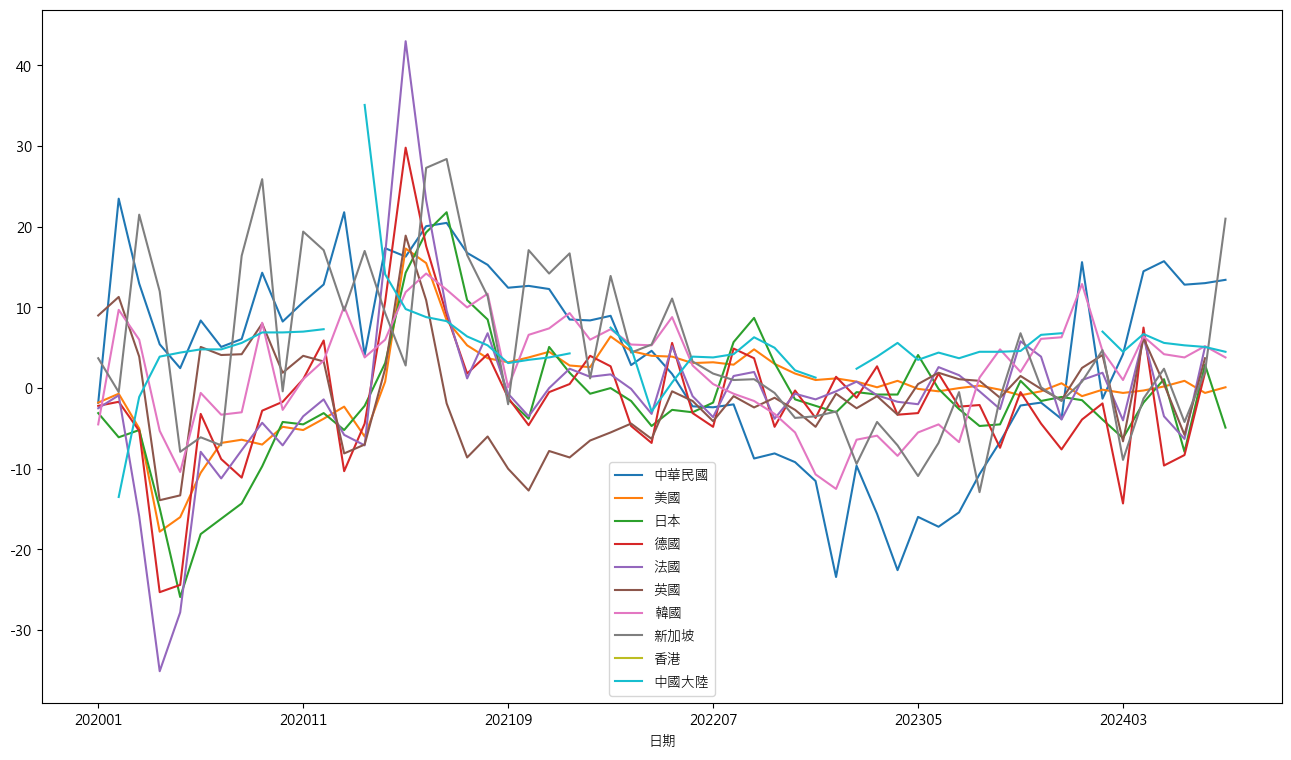

In [10]:
df[df.index>'2020'].plot(figsize = (16,9))